# P-374: PROJECT – RESUME CLASSIFICATION

Business objective- The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention


In [1]:
import warnings
warnings.filterwarnings("ignore")

# Data Importing:

In [3]:
import os

# Function to read all Word files from a folder and extract folder names as categories
def read_files_and_categories(folder_path):
    categories = []
    file_paths = []
    file_categories = []

    # Iterate over each folder in the given directory
    for root, dirs, files in os.walk(folder_path):
        for directory in dirs:
            category = directory
            category_folder_path = os.path.join(root, directory)
            # Iterate over each file in the folder
            for file_name in os.listdir(category_folder_path):
                if file_name.endswith(('.docx', '.doc','.pdf')):  # Check for both .docx and .doc files
                    file_paths.append(os.path.join(category_folder_path, file_name))
                    categories.append(category)
                    file_categories.append(category)

    return file_paths, file_categories

folder_path = "C:\\Users\\shiva\\Downloads\\Final\\Resumes"  
file_paths, categories = read_files_and_categories(folder_path)

# Print unique categories
print("Unique Categories:", set(categories))

Unique Categories: {'workday resumes', 'React Developer', 'SQL Developer Lightning insight', 'Peoplesoft resumes'}


In [4]:
file_count = len(file_paths)
print("Number of files in the folder:", file_count)
# file_paths

Number of files in the folder: 77


## Profile Category

In [7]:
import os

file_path = r"C:\Users\shiva\Downloads\Final\Resumes"

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)
    if os.path.isdir(folder_path):
        try:
            for file in os.listdir(folder_path):
                if file.endswith('.doc'):
                    profile.append(folder)
        except FileNotFoundError as e:
            print(f"Error: {e}")
    else:
        print(f"{folder_path} is not a directory.")


In [8]:
import pandas as pd
resume_data = pd.DataFrame()
resume_data['Categories'] = profile
resume_data['Resumes Path'] = file_name
resume_data

Empty DataFrame
Columns: [Categories, Resumes Path]
Index: []

In [9]:
resume_data.Categories.value_counts().index

Index([], dtype='float64', name='Categories')

In [10]:
resume_data.Categories.value_counts()

Series([], Name: count, dtype: int64)

In [12]:
pip install matplotlib


^C
Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     --------- --------------------------- 41.0/162.8 kB 330.3 kB/s eta 0:00:01
     --------- --------------------------- 41.0/162.8 kB 330.3 kB/s eta 0:00:01
     ------------------------------------ 162.8/162.8 kB 751.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
    --------------------------------------- 0.1/7.7 MB 3.6 MB/s eta 0:00:03
   - -------------------------------------- 0.2/7.7 MB 3.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.7 MB 5.0 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.7 MB 3.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/7.7 MB 4.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.7 MB 4.6 MB/s eta 0:00:02
   -------- --

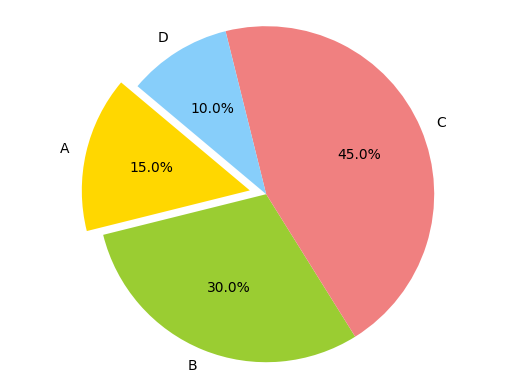

In [14]:
import matplotlib.pyplot as plt

sizes = [15, 30, 45, 10]
labels = ['A', 'B', 'C', 'D']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Define the explode list with the same length as sizes
explode = (0.1, 0, 0, 0)  # Adjust the explode values as needed

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%',
        startangle=140, explode=explode)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# Data Preparation:

## Converting Doc file to Docx

In [15]:
import os
import win32com.client
import time

def convert_to_docx(doc_file_path):
    # Split the file path into directory and filename parts
    directory, filename = os.path.split(doc_file_path)

    # Split the filename into name and extension parts
    name, extension = os.path.splitext(filename)

    # Define the new file path with .docx extension
    docx_file_path = os.path.join(directory, name + ".docx")
    try:
        if os.path.isfile(doc_file_path) and not os.path.exists(docx_file_path): # Check if the .doc file exists
            

            word = win32com.client.Dispatch("Word.Application")
            word.Visible = False  # Hide Word window
            word.DisplayAlerts = False  # Disable any alerts (e.g., for saving changes)
            
            # Add a delay to ensure Word is fully initialized
            time.sleep(5)  # Adjust the delay as needed
            
            doc = word.Documents.Open(doc_file_path)
            doc.SaveAs(docx_file_path, FileFormat=16)  # FileFormat 16 is for .docx format
            doc.Close()
            word.Quit()
            print(f"File converted successfully to: {docx_file_path}")
            os.remove(doc_file_path)
        elif os.path.exists(docx_file_path):
            print("Docx file is there, Skiping converting: {docx_file_path}")
        else:
            print("Input file does not exist: {docx_file_path}")
    except Exception as e:
        print(f"Error: {e}")

In [16]:
import os
current_directory = os.getcwd()
# print("Current working directory:", current_directory)
file_path = r'Resumes/'
doc_file_paths=[]
profile   = []
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            full_file_path =os.path.normpath(os.path.join(current_directory, folder_path,file))
            # path=os.path.join(current_directory, folder_path,file)
            doc_file_paths.append(full_file_path)
doc_file_paths

[]

In [17]:
for doc_file_path in doc_file_paths:
    convert_to_docx(doc_file_path)

Note: Converted

## Importing Doc File

In [18]:
import os
current_directory = os.getcwd()
# Function to read all Word files from a folder and extract folder names as categories
def read_files_and_categories(folder_path):
    categories = []
    file_paths = []
    file_categories = []

    # Iterate over each folder in the given directory
    for root, dirs, files in os.walk(folder_path):
        for directory in dirs:
            category = directory
            category_folder_path = os.path.join(root, directory)
            # Iterate over each file in the folder
            for file_name in os.listdir(category_folder_path):
                if file_name.endswith('.doc'):
                    file_paths.append(os.path.join(current_directory,category_folder_path, file_name))
                    categories.append(category)
                    file_categories.append(category)

    return file_paths, file_categories

folder_path = "Resumes"  
file_paths, categories = read_files_and_categories(folder_path)

# Print unique categories
print("Unique Categories:", set(categories))

file_count = len(file_paths)
print("Number of Doc files in the folder:", file_count)
# file_paths

Unique Categories: set()
Number of Doc files in the folder: 0


In [19]:
import os
import win32com.client

def extract_text_from_doc(file_path):
    try:
        if os.path.isfile(file_path):  # Check if the file exists
            word = win32com.client.Dispatch("Word.Application")
            word.Visible = False
            doc = word.Documents.Open(file_path)
            text = doc.Content.Text
            doc.Close()
            word.Quit()
            return text
        else:
            print("File does not exist.")
            return None
    except Exception as e:
        print(f"Error: {e}")
        return None

In [20]:
# Read resumes and their categories
def load_data(file_paths, categories):
    documents = []
    labels = []
    for i, file_path in enumerate(file_paths):
        category  = categories[i]     # Categories for each resume
        text = extract_text_from_doc(file_path)
        documents.append(text)
        labels.append(category)
        # print(text)
        
    return documents, labels
documents, labels = load_data(file_paths, categories)
print(len(labels))
print(len(documents))
# labels

0
0


In [21]:
# for i in range(len(file_paths)):
#     print(i)
#     file_path=file_paths[i]
#     print(file_path)
#     text=extract_text_from_doc(file_path)
#     print(text)
#     preprocess_text(text)
    

In [22]:
# file_path=file_paths[12]
# print(file_path)
# text=extract_text_from_doc(file_path)
# print(text)
# preprocess_text(text)

## Importing Docx File 

In [23]:
import os

# Function to read all Word files from a folder and extract folder names as categories
def read_files_and_categories(folder_path):
    categories = []
    file_paths = []
    file_categories = []

    # Iterate over each folder in the given directory
    for root, dirs, files in os.walk(folder_path):
        for directory in dirs:
            category = directory
            category_folder_path = os.path.join(root, directory)
            # Iterate over each file in the folder
            for file_name in os.listdir(category_folder_path):
                if file_name.endswith('.docx'):
                    file_paths.append(os.path.join(category_folder_path, file_name))
                    categories.append(category)
                    file_categories.append(category)

    return file_paths, file_categories

folder_path = "Resumes"  
file_paths, categories = read_files_and_categories(folder_path)

# Print unique categories
print("Unique Categories:", set(categories))

file_count = len(file_paths)
print("Number of Docx files in the folder:", file_count)
# file_paths

Unique Categories: {'workday resumes', 'React Developer', 'SQL Developer Lightning insight', 'Peoplesoft resumes'}
Number of Docx files in the folder: 76


In [24]:
import docx
# Read Word files and extract text
def extract_text_from_docx(file_path):
    doc = docx.Document(file_path)
    text = []
    for paragraph in doc.paragraphs:
        text.append(paragraph.text)
    return '\n'.join(text)


In [25]:
# Read resumes and their categories
def load_data(file_paths, categories):
    documents = []
    labels = []
    for i, file_path in enumerate(file_paths):
        category  = categories[i]     # Categories for each resume
        text = extract_text_from_docx(file_path)
        documents.append(text)
        labels.append(category)
    return documents, labels

documents, labels = load_data(file_paths, categories)
print(len(labels))
print(len(documents))
# labels

76
76


# Import PDF file

In [26]:
import os
current_directory = os.getcwd()
# Function to read all Word files from a folder and extract folder names as categories
def read_files_and_categories(folder_path):
    categories = []
    file_paths = []
    file_categories = []

    # Iterate over each folder in the given directory
    for root, dirs, files in os.walk(folder_path):
        for directory in dirs:
            category = directory
            category_folder_path = os.path.join(root, directory)
            # Iterate over each file in the folder
            for file_name in os.listdir(category_folder_path):
                if file_name.endswith('.pdf'):
                    file_paths.append(os.path.join(current_directory,category_folder_path, file_name))
                    categories.append(category)
                    file_categories.append(category)

    return file_paths, file_categories

folder_path = "Resumes"  
file_paths, categories = read_files_and_categories(folder_path)

# Print unique categories
print("Unique Categories:", set(categories))

file_count = len(file_paths)
print("Number of PDF files in the folder:", file_count)
# file_paths

Unique Categories: {'React Developer'}
Number of PDF files in the folder: 1


In [27]:
import PyPDF2

def extract_text_from_pdf(file_path):
    try:
        with open(file_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            text = ""
            for page_num in range(len(reader.pages)):
                text += reader.pages[page_num].extract_text()
            return text
    except Exception as e:
        print(f"Error: {e}")
        return None


In [28]:
# Read resumes and their categories
def load_data(file_paths, categories):
    # documents = []
    # labels = []
    for i, file_path in enumerate(file_paths):
        category  = categories[i]     # Categories for each resume
        text = extract_text_from_pdf(file_path)
        documents.append(text)
        labels.append(category)
        # print(text)
        
    return documents, labels
documents, labels = load_data(file_paths, categories)
print(len(labels))
print(len(documents))
# labels

77
77


In [29]:
documents[76]

'   \nPage | 1  \n Name: M. Prabakaran  \nTitle: UI Developer  \n \nPROFESSIONAL SUMMARY  \n \n● 2.4+ years of Professional IT experience as a software developer having knowledge on different UI based \nApplication.  \n● Hands on experience in HTML, CSS, JS, ReactJS.   \n● Hands on experience in handling UI interaction, Design methodology.  \n● Handling In -App purchase, uploading and maintaining apps in play store.  \n● Hands on experience with customization over base -product depends on  client requirement.  \n● Cohesive team worker, having strong analytical, problem solving and interpersonal skills.  \n \nEDUCATION  \n \n● Completed on 2017 Bachelor of Technology (ECE) , PRIST University, Tamil Nadu.  \n● Completed on 2012 Higher Secondary , Mount Park Hr Sec School , Thiyagadurgam,  Tamil Nadu.  \n● Completed on 2010 SSLC , Krishnasamy Hr Sec School , Cuddalore,  Tamil Nadu.  \n \nSKILLS  \n \nOperating System  Windows, Unix,Mac  \nProgramming Languages  HTML, CSS, JS, React  \nMob

# Preprocess text data:

In [30]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words to their base form
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a single string
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

# Preprocess text
# count=0
# for doc in documents:
#     count+=1
#     # print(count)
#     preprocessed_documents = preprocess_text(doc)
preprocessed_documents = [preprocess_text(doc) for doc in documents]
preprocessed_documents


['anubhav kumar singh work globally competitive environment challenging assignment shall yield twin benefit job satisfaction steadypaced professional growth professional experience current hcl current role system admin offshore skill shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environment along support environment installed linux window o involved day day activity project migration database refresh system admin change tax update etc troubleshooting various server like application server web server process scheduler server applying tuxedo weblogic middleware cpu patch various application working shell scripting used integration method exchange file external system installation troubleshooting tier setup per requirement reviewing vulnerability reported security team renewal ssl weblogic vulnerability remediation whenever vulnerability report rmis team worked pum peoplesoft update manager installation dpk working knowledge ansi

In [33]:
pip install seaborn



   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 119.1 kB/s eta 0:00:03
   ------ -------------------------------- 51.2/294.9 kB 175.0 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/294.9 kB 218.6 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/294.9 kB 218.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 273.1 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 339.7 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 339.7 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/294.9 kB 397.7 kB/s eta 0:00:01
 

In [35]:
pip install wordcloud



   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 130.4 kB/s eta 0:00:03
   --- ----------------------------------- 30.7/300.2 kB 130.4 kB/s eta 0:00:03
   ----- --------------------------------- 41.0/300.2 kB 140.3 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 140.3 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 172.4 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/300.2 kB 227.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 227.6 kB/s eta 0:00:01
   -------

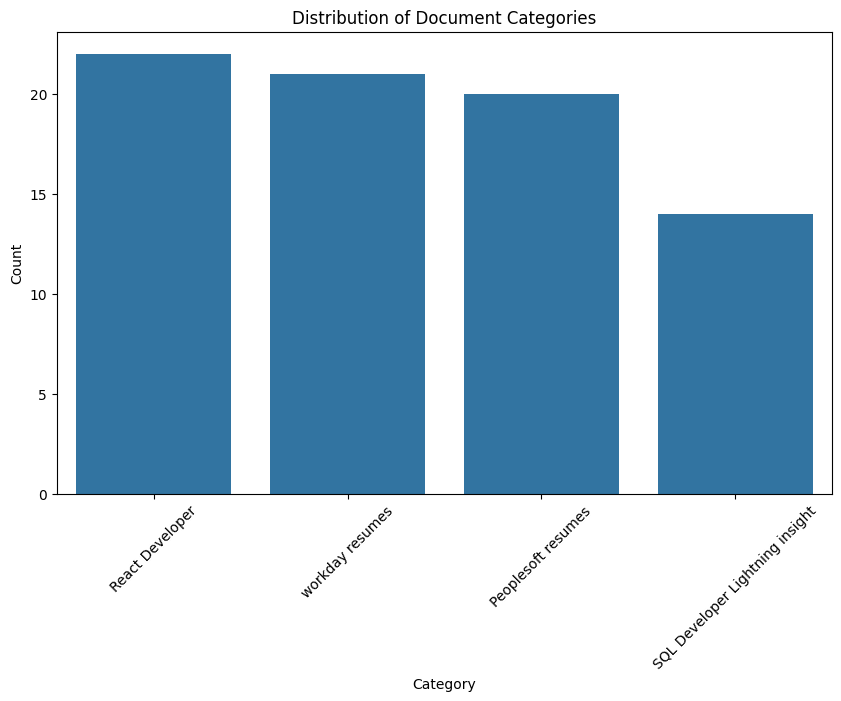

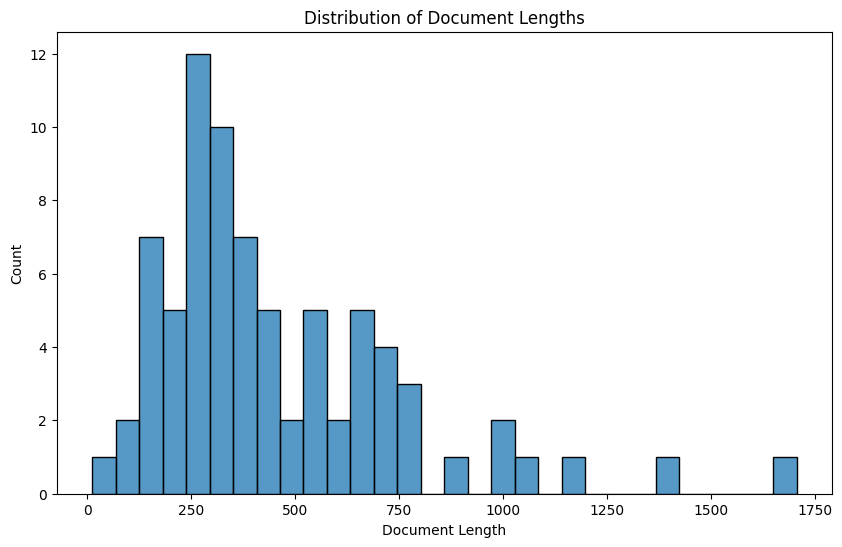

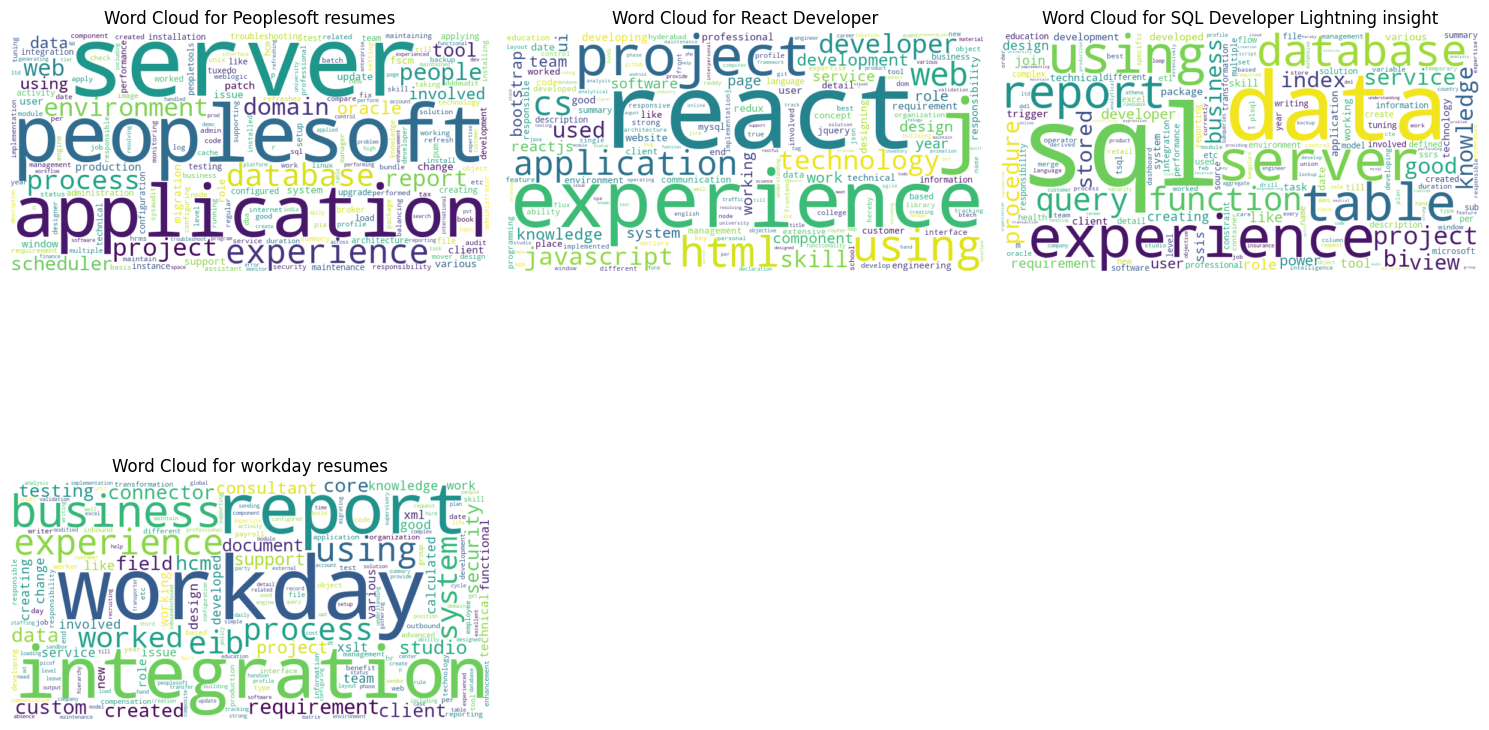

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas

df = pd.DataFrame({'document_text': preprocessed_documents, 'category': labels})


category_counts = df['category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Document Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#  let's analyze the length of documents
df['document_length'] = df['document_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['document_length'], bins=30)
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Count')
plt.show()

#  let's identify common words in each document category
category_words = {}
for category in df['category'].unique():
    category_text = " ".join(df[df['category'] == category]['document_text'])
    words = category_text.split()
    word_counts = Counter(words)
    category_words[category] = word_counts


from wordcloud import WordCloud

plt.figure(figsize=(15, 10))
for i, category in enumerate(category_words.keys(), start=1):
    plt.subplot(2, 3, i)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_words[category])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category}')
    plt.axis('off')
plt.tight_layout()
plt.show()


# Box plot

([0, 1, 2, 3],
 [Text(0, 0, 'Peoplesoft resumes'),
  Text(1, 0, 'React Developer'),
  Text(2, 0, 'SQL Developer Lightning insight'),
  Text(3, 0, 'workday resumes')])

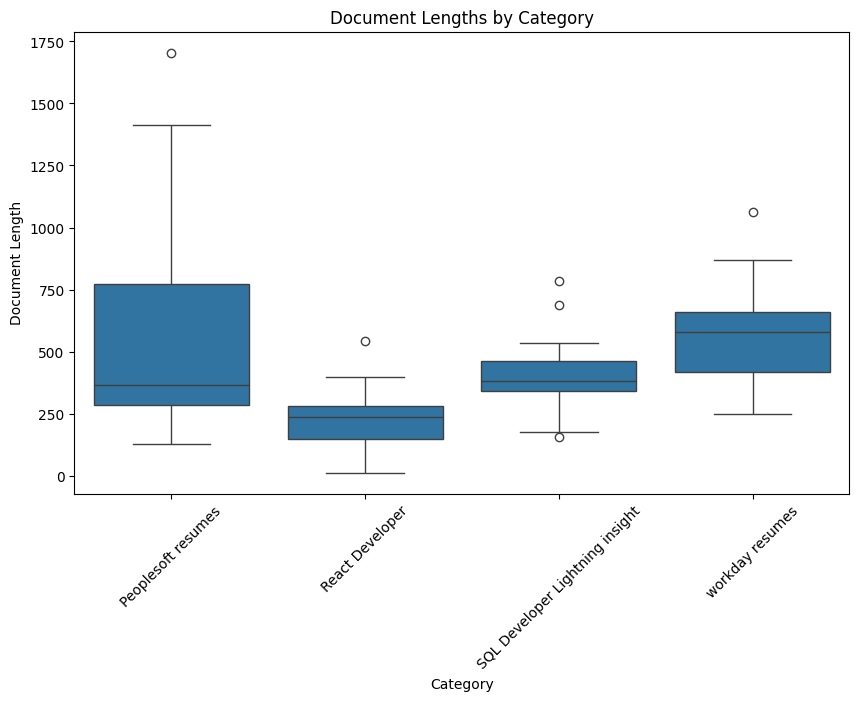

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='document_length', data=df)
plt.title('Document Lengths by Category')
plt.xlabel('Category')
plt.ylabel('Document Length')
plt.xticks(rotation=45)


# Count plot for most comman words

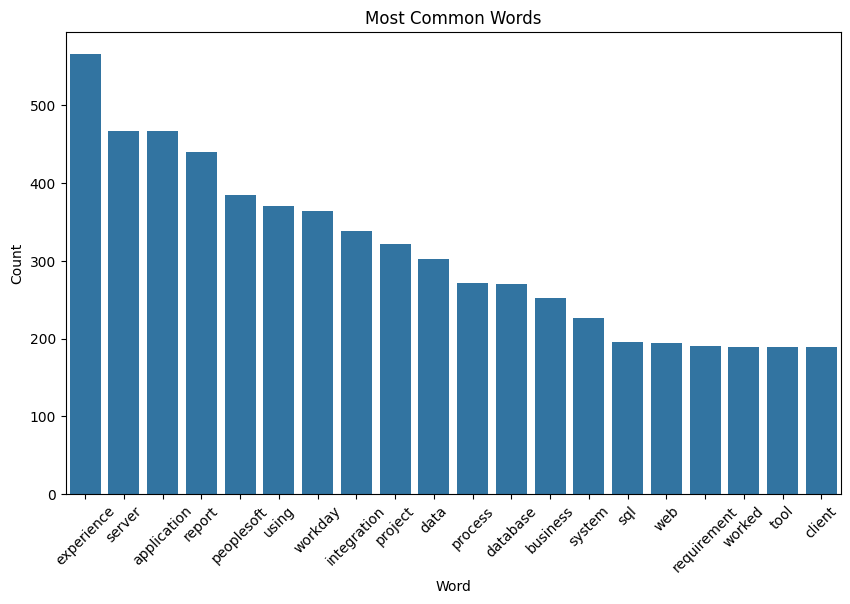

In [39]:
all_words = " ".join(df['document_text']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title('Most Common Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Heatmap of Word Occurrences in Each Category

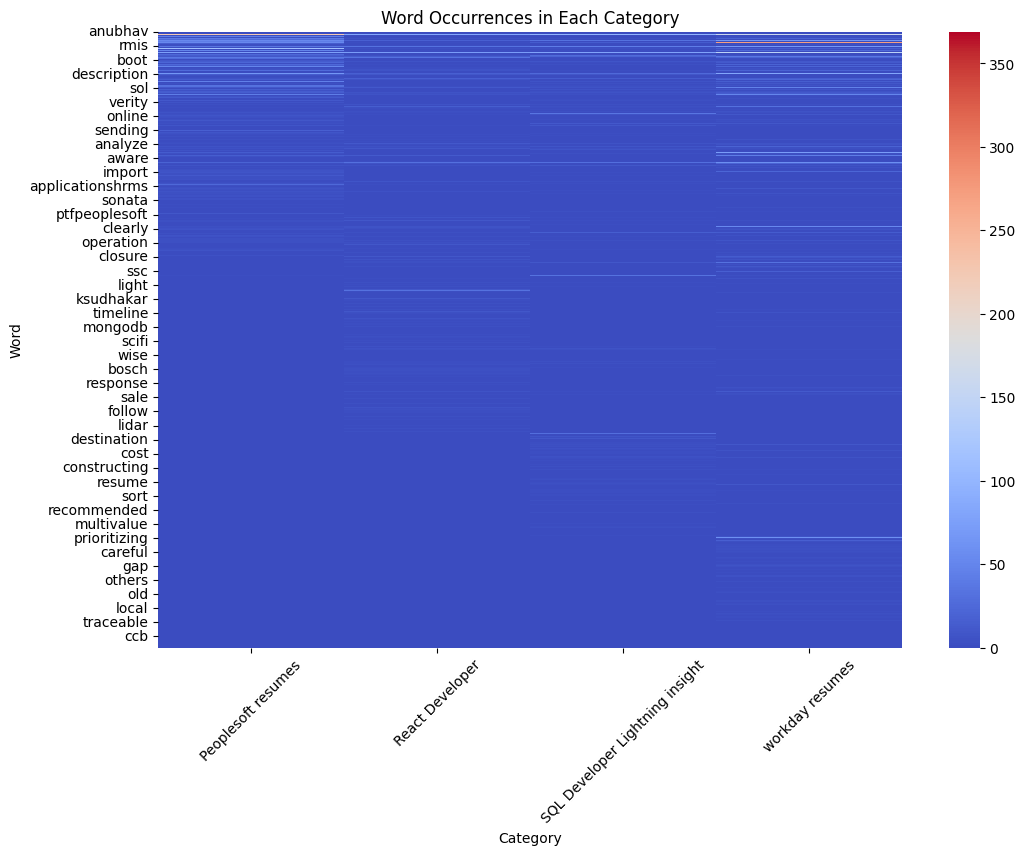

In [40]:

word_occurrences = pd.DataFrame.from_dict({category: category_words[category] for category in category_words.keys()})
word_occurrences.fillna(0, inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(word_occurrences, cmap='coolwarm')
plt.title('Word Occurrences in Each Category')
plt.xlabel('Category')
plt.ylabel('Word')
plt.xticks(rotation=45)
plt.show()


# Pairplot of Document Lengths and Word Counts

<Figure size 2500x1000 with 0 Axes>

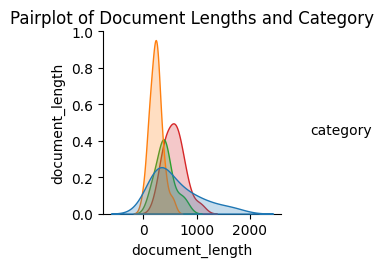

In [41]:
plt.figure(figsize=(25, 10))
sns.pairplot(df[['document_length', 'category']], hue='category')
plt.title('Pairplot of Document Lengths and Category')
plt.show()


In [42]:
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer


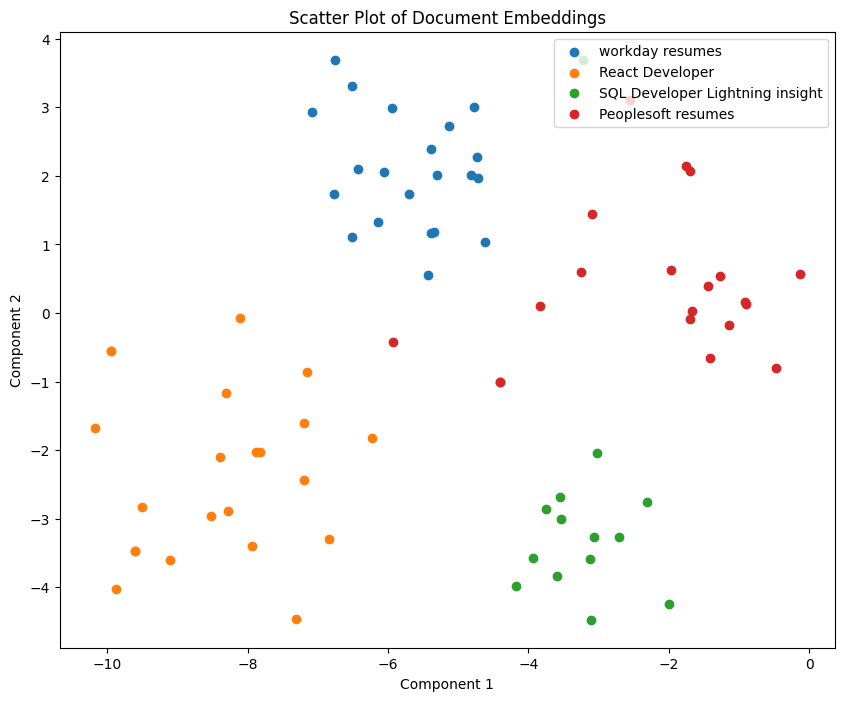

In [43]:
from sklearn.decomposition import PCA

# Convert documents into TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(documents)


pca = PCA(n_components=50)  
X_pca = pca.fit_transform(X_tfidf.toarray())

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_reduced = tsne.fit_transform(X_pca)

# Create scatter plot
plt.figure(figsize=(10, 8))
for category in set(labels):
    indices = [i for i, label in enumerate(labels) if label == category]
    if len(indices) > 0:
        plt.scatter(X_reduced[indices, 0], X_reduced[indices, 1], label=category)
if len(set(labels)) > 1:
    plt.legend()
plt.title('Scatter Plot of Document Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

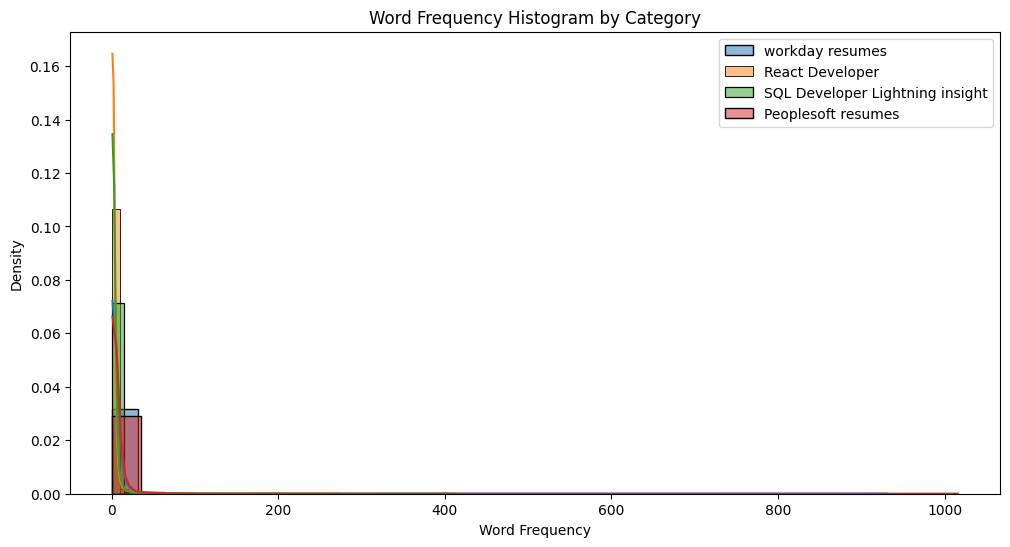

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Sample data
plt.figure(figsize=(12, 6))
for category in set(labels):
    indices = [i for i, label in enumerate(labels) if label == category]
    category_text = " ".join([documents[i] for i in indices])
    word_counts = Counter(category_text.split())
    sns.histplot(list(word_counts.values()), bins=30, alpha=0.5, label=category, kde=True, stat='density')

plt.title('Word Frequency Histogram by Category')
plt.xlabel('Word Frequency')
plt.ylabel('Density')
plt.legend()
plt.show()


# Convert text to numerical features

## Convert text to numerical features using TF-IDF

In [45]:
# import numpy as np
# # Convert sparse matrix to dense array
# tfidf_vector_dense = X.toarray()

# # Save TF-IDF vector to a file
# np.savetxt('tfidf_vector.txt', tfidf_vector_dense)

# # Convert TF-IDF vector to DataFrame
# df_tfidf = pd.DataFrame(tfidf_vector_dense, columns=tfidf_vectorizer.get_feature_names_out())

# df_tfidf.to_excel('tfidf_vector.xlsx', index=False)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')

# Fit TF-IDF vectorizer on entire corpus
tfidf_vectorizer.fit(preprocessed_documents)

# Transform individual documents to TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.transform([preprocessed_documents[2]])
print("TF-IDF Vector Shape:", X_train_tfidf.shape)


TF-IDF Vector Shape: (1, 3746)


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
# tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(preprocessed_documents)
# print(X)
X.shape

(77, 3746)

## Word embedding

In [50]:
pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 110.1 kB/s eta 0:03:38
   ---------------------------------------- 0.0/24.0 MB 146.3 kB/s eta 0:02:44
   ---------------------------------------- 0.0/24.0 MB 196.9 kB/s eta 0:02:02
   ---------------------------------------- 0.1/24.0 MB 306.3 kB/s eta 0:01:19
   ---------------------------------------- 0.2/24.0 MB 518.9 kB/s eta 0:00:46
   ---------------------------------------- 0.3/24.0 MB 806.1 kB/s eta 0:00:30
    --------------------------------------- 0.5/24.0 MB 1.3 MB/s eta 0:00:18
   - -------------------------------------- 0.8/24.0 MB 1.9 MB/s eta 0:00:13
   -- ------------------------------------- 1.4/24.0 MB 2.8 MB/s eta 0:00:09
   -- ---------

In [51]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


# Convert documents to list of tokens
tokenized_documents = [doc.split() for doc in preprocessed_documents]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_documents, vector_size=100, window=5, min_count=1, workers=4)

# Example: Get word embedding for a specific word
word_embedding = word2vec_model.wv['experience']

# Example: Find similar words
similar_words = word2vec_model.wv.most_similar('experience')

# Get document embeddings
document_embeddings = []
for doc in tokenized_documents:
    # Average word embeddings for each word in the document
    doc_embedding = np.mean([word2vec_model.wv[word] for word in doc], axis=0)
    document_embeddings.append(doc_embedding)

# Convert document embeddings to numpy array
document_embeddings = np.array(document_embeddings)

# Now you can use document_embeddings for document classification


### Visualization using PCA

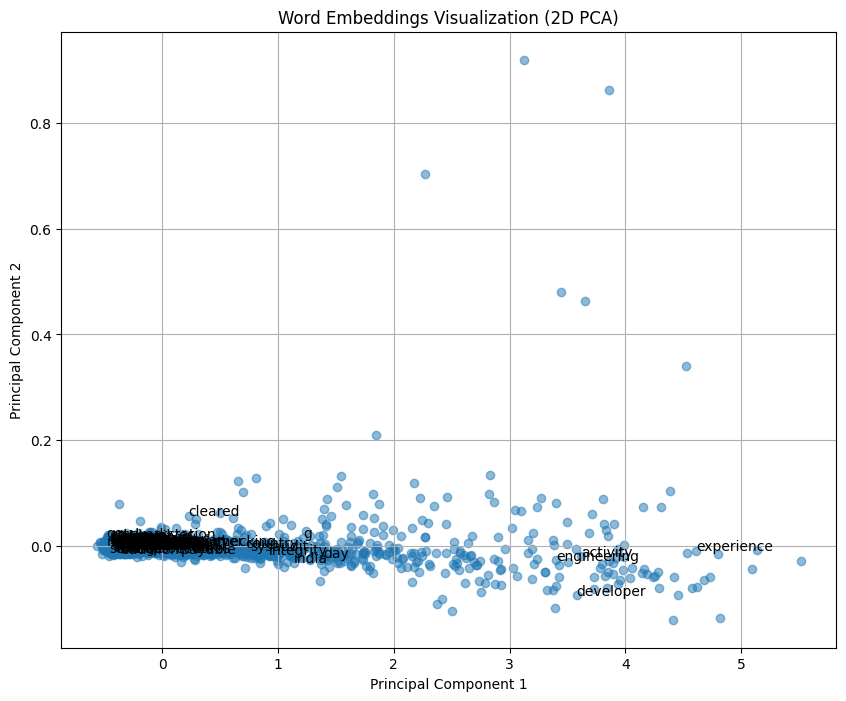

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec

# Assuming you have trained a Word2Vec model and stored it in word2vec_model
# word2vec_model = Word2Vec(...)

# Get all unique words from the vocabulary
words = list(word2vec_model.wv.index_to_key)

# Extract word embeddings for all words
embeddings = [word2vec_model.wv[word] for word in words]

# Perform PCA to reduce the dimensionality of word embeddings to 2 dimensions
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot word embeddings in 2D space
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)

# Annotate some words for better interpretation
for i, word in enumerate(words):
    if i % 50 == 0:  # To avoid overcrowding the plot, annotate every 50th word
        plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('Word Embeddings Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# Model Building - By import data

### TF-IDF

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.80      0.89         5
                React Developer       1.00      1.00      1.00         3
SQL Developer Lightning insight       1.00      0.25      0.40         4
                workday resumes       0.50      1.00      0.67         4

                       accuracy                           0.75        16
                      macro avg       0.88      0.76      0.74        16
                   weighted avg       0.88      0.75      0.73        16



### Word embeddings

In [56]:
from sklearn.naive_bayes import GaussianNB

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(document_embeddings, labels, test_size=0.2, random_state=42)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))


                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.60      0.75         5
                React Developer       1.00      0.33      0.50         3
SQL Developer Lightning insight       0.38      0.75      0.50         4
                workday resumes       0.75      0.75      0.75         4

                       accuracy                           0.62        16
                      macro avg       0.78      0.61      0.62        16
                   weighted avg       0.78      0.62      0.64        16



In [57]:
X_embeddings=pd.DataFrame(document_embeddings)
X_embeddings.shape

(77, 100)

In [58]:
labels_df = pd.DataFrame(labels, columns=['Labels'])
labels_df.shape

(77, 1)

In [59]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
labels_Encoder=labels_df.copy()
labels_Encoder["Labels"]=Encoder.fit_transform(labels_Encoder["Labels"])

labels_Encoder

Labels
0        0
1        0
2        0
3        0
4        0
..     ...
72       3
73       3
74       3
75       3
76       1

[77 rows x 1 columns]

In [60]:
from sklearn.naive_bayes import GaussianNB

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, labels_Encoder, test_size=0.2, random_state=42)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.33      0.50         3
           2       0.38      0.75      0.50         4
           3       0.75      0.75      0.75         4

    accuracy                           0.62        16
   macro avg       0.78      0.61      0.62        16
weighted avg       0.78      0.62      0.64        16



In [61]:
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_embeddings, labels_df, test_size=0.2, random_state=42)

# classifier = MultinomialNB()
# classifier.fit(X_train, y_train)

# # Evaluate the classifier
# y_pred = classifier.predict(X_test)
# print(classification_report(y_test, y_pred))

## TF-IDF Data & Word embedding

In [62]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)    # TF-IDF Data
# X_train, X_test, y_train, y_test = train_test_split(X_embeddings, labels_Encoder, test_size=0.2, random_state=42)

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
pip install xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 186.2 kB/s eta 0:08:56
   ---------------------------------------- 0.0/99.8 MB 196.9 kB/s eta 0:08:27
   ---------------------------------------- 0.1/99.8 MB 326.8 kB/s eta 0:05:06
   ---------------------------------------- 0.2/99.8 MB 573.4 kB/s eta 0:02:54
   ---------------------------------------- 0.2/99.8 MB 655.1 kB/s eta 0:02:32
   ---------------------------------------- 0.3/99.8 MB 893.0 kB/s eta 0:01:52
   ---------------------------------------- 0.3/99.8 MB 893.0 kB/s eta 0:01:52
   ---------------------------------------- 0.5/99.8 MB 1.1 MB/s eta 0:01:28
   ---------------------------------------- 0.6/99.8 MB 1.2 MB/s eta 0:01:20
   ---------

In [67]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.57
Accuracy of  test set    : 0.44
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.20      0.33         5
                React Developer       1.00      0.67      0.80         3
SQL Developer Lightning insight       0.00      0.00      0.00         4
                workday resumes       0.31      1.00      0.47         4

                       accuracy                           0.44        16
                      macro avg       0.58      0.47      0.40        16
                   weighted avg       0.58      0.44      0.37        16




## **2.Decision Tree Classifier**

In [69]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier DecisionTreeClassifier():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
                React Developer       1.00      1.00      1.00         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         4

                       accuracy                           1.00        16
                      macro avg       1.00      1.00      1.00        16
                   weighted avg       1.00      1.00      1.00        16




## 5.3 Random Forest Classifier

In [70]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
                React Developer       1.00      1.00      1.00         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         4

                       accuracy                           1.00        16
                      macro avg       1.00      1.00      1.00        16
                   weighted avg       1.00      1.00      1.00        16




## **4. Support Vectore Machine (SVM) Classifier**

In [71]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.88
Classification report for classifier SVC():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.80      0.89         5
                React Developer       0.60      1.00      0.75         3
SQL Developer Lightning insight       1.00      0.75      0.86         4
                workday resumes       1.00      1.00      1.00         4

                       accuracy                           0.88        16
                      macro avg       0.90      0.89      0.87        16
                   weighted avg       0.93      0.88      0.88        16




## **5.Logistic Regression**

In [72]:
model_lgr = LogisticRegression()
model_lgr.fit(X_train, y_train)
y_pred = model_lgr.predict(X_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.94
Classification report for classifier LogisticRegression():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.80      0.89         5
                React Developer       0.75      1.00      0.86         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         4

                       accuracy                           0.94        16
                      macro avg       0.94      0.95      0.94        16
                   weighted avg       0.95      0.94      0.94        16




## **6.Bagging Classifier**

In [77]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(X_train, y_train)
y_pred = model_bagg.predict(X_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.95
Accuracy of  test set    : 0.94
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.80      0.89         5
                React Developer       1.00      1.00      1.00         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       0.80      1.00      0.89         4

                       accuracy                           0.94        16
                      macro avg       0.95      0.95      0.94        16
                   weighted avg       0.95      0.94      0.94        16




## **7. AdaBoost Classifier**

In [78]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(X_train, y_train)
y_pred = model_Adaboost.predict(X_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
                React Developer       1.00      1.00      1.00         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         4

                       accuracy                           1.00        16
                      macro avg       1.00      1.00      1.00        16
                   weighted avg       1.00      1.00      1.00        16




## **8.Gradient Boosting Classifier**

In [79]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(X_train, y_train)
y_pred = model_GradientBoost.predict(X_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         5
                React Developer       1.00      1.00      1.00         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       1.00      1.00      1.00         4

                       accuracy                           1.00        16
                      macro avg       1.00      1.00      1.00        16
                   weighted avg       1.00      1.00      1.00        16




## **9.Naive Bayes Classifier**


In [80]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(X_train, y_train)
y_pred = model_NB.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.94
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.80      0.89         5
                React Developer       1.00      1.00      1.00         3
SQL Developer Lightning insight       1.00      1.00      1.00         4
                workday resumes       0.80      1.00      0.89         4

                       accuracy                           0.94        16
                      macro avg       0.95      0.95      0.94        16
                   weighted avg       0.95      0.94      0.94        16




# Model Evaluation

In [81]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(X_train, y_train),model_DT.score(X_train, y_train),model_RF.score(X_train, y_train),model_svm.score(X_train, y_train),model_lgr.score(X_train, y_train),
                                 model_bagg.score(X_train, y_train),model_Adaboost.score(X_train, y_train),model_GradientBoost.score(X_train, y_train), model_NB.score(X_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

Models  Train_Accuracy(%)  Test_Accuracy(%)  \
0                KNN Classifier            0.57377              0.44   
1       DecisionTree Classifier            1.00000              1.00   
2       RandomForest Classifier            1.00000              1.00   
3                SVM Classifier            1.00000              0.88   
4           Logistic Regression            1.00000              0.94   
5            Bagging Classifier            0.95082              0.94   
6           AdaBoost Classifier            1.00000              1.00   
7  Gradient Boosting Classifier            1.00000              1.00   
8        Naive Bayes Classifier            1.00000              0.94   

   Precision(%)  Recall(%)  F1-Score(%)  
0          0.58       0.47         0.40  
1          1.00       1.00         1.00  
2          1.00       1.00         1.00  
3          0.90       0.89         0.87  
4          0.94       0.95         0.94  
5          0.95       0.95         0.94  
6          1.00       1.00         1.00  
7          1.00       1.00         1.00  
8          0.95       0.95         0.94

In [82]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(X_train, y_train)*100,model_DT.score(X_train, y_train)*100,
                  model_RF.score(X_train, y_train)*100,model_svm.score(X_train, y_train)*100,
                  model_lgr.score(X_train, y_train)*100,model_bagg.score(X_train, y_train)*100,
                  model_Adaboost.score(X_train, y_train)*100,model_GradientBoost.score(X_train, y_train)*100,
                  model_NB.score(X_train, y_train)*100]

## Train and Test Accuracy Plot

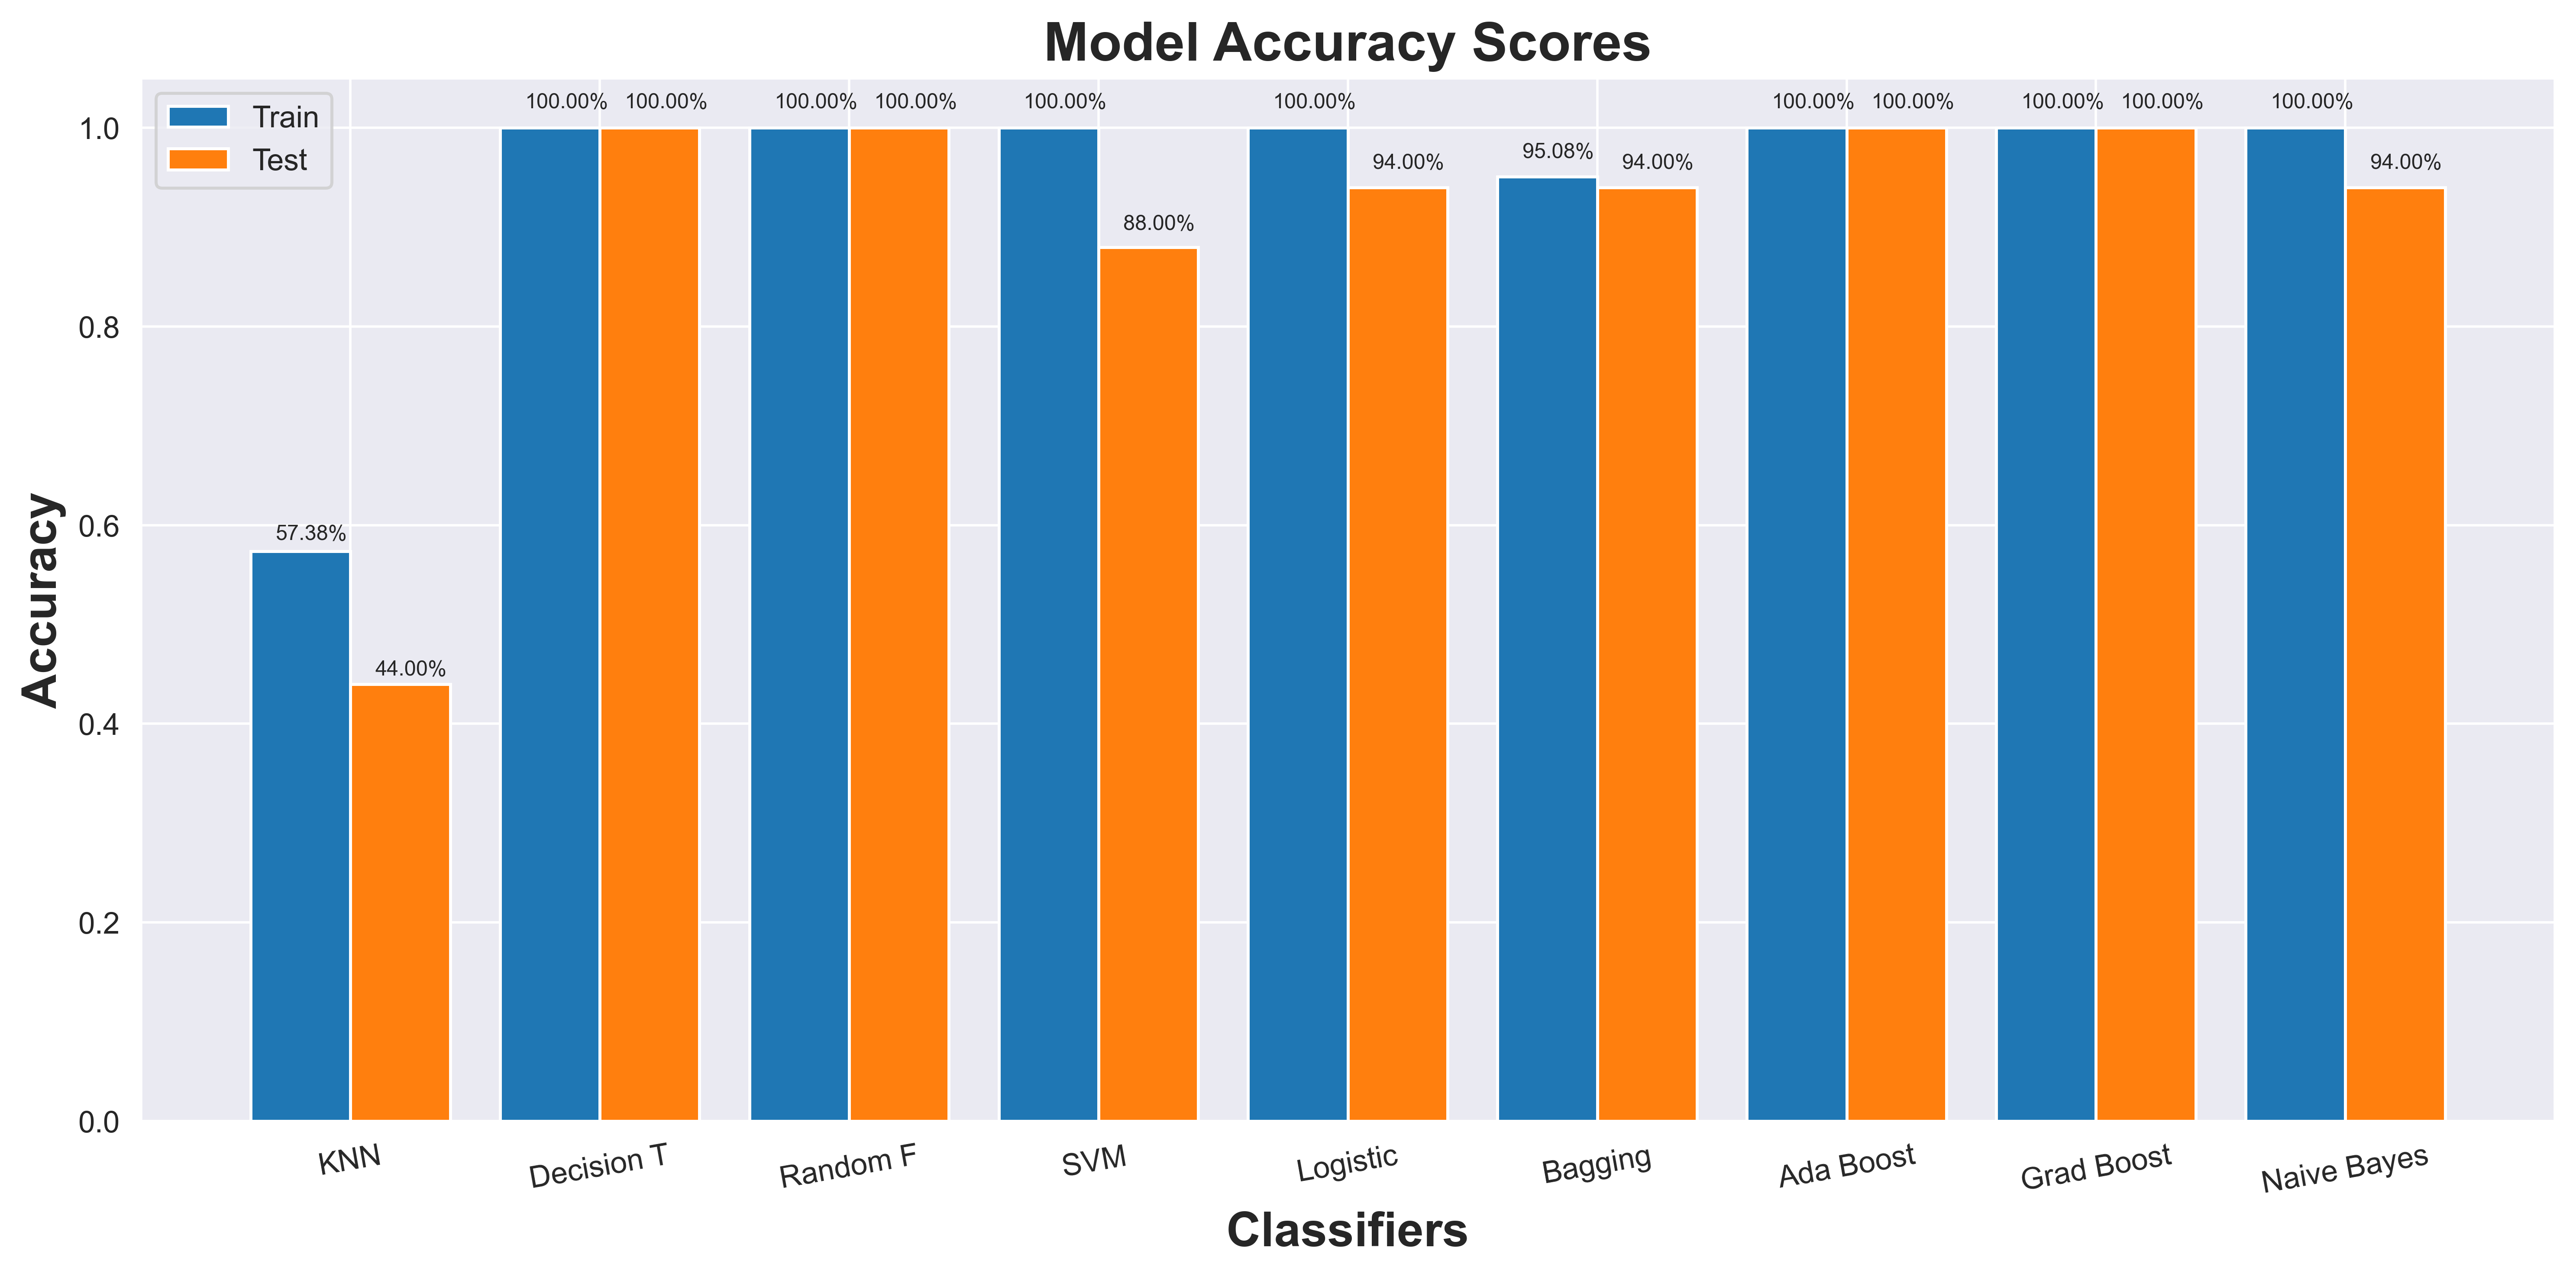

In [83]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train')
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test')
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
# fig.savefig('IMG\Mod_Acc_Bar', dpi = 300)

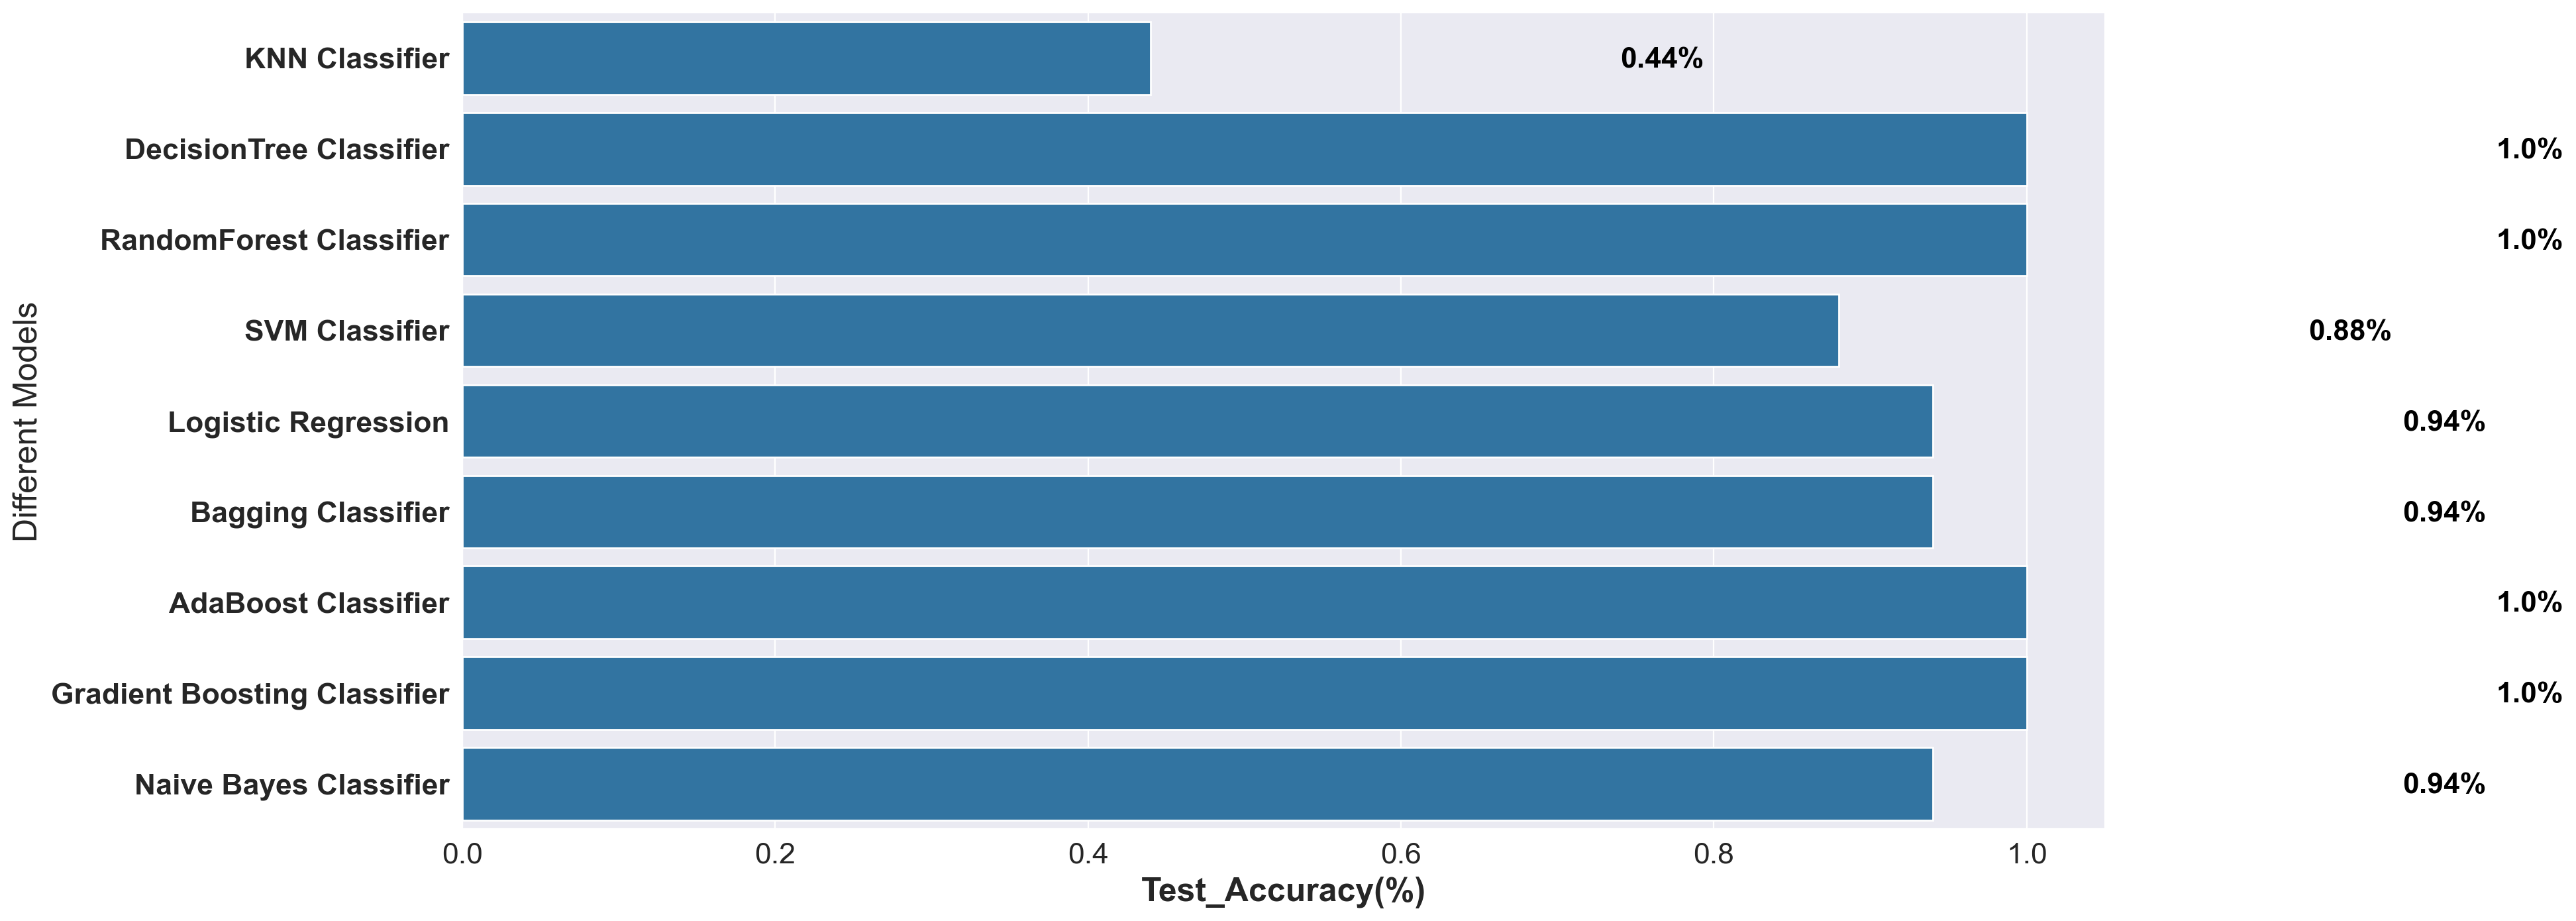

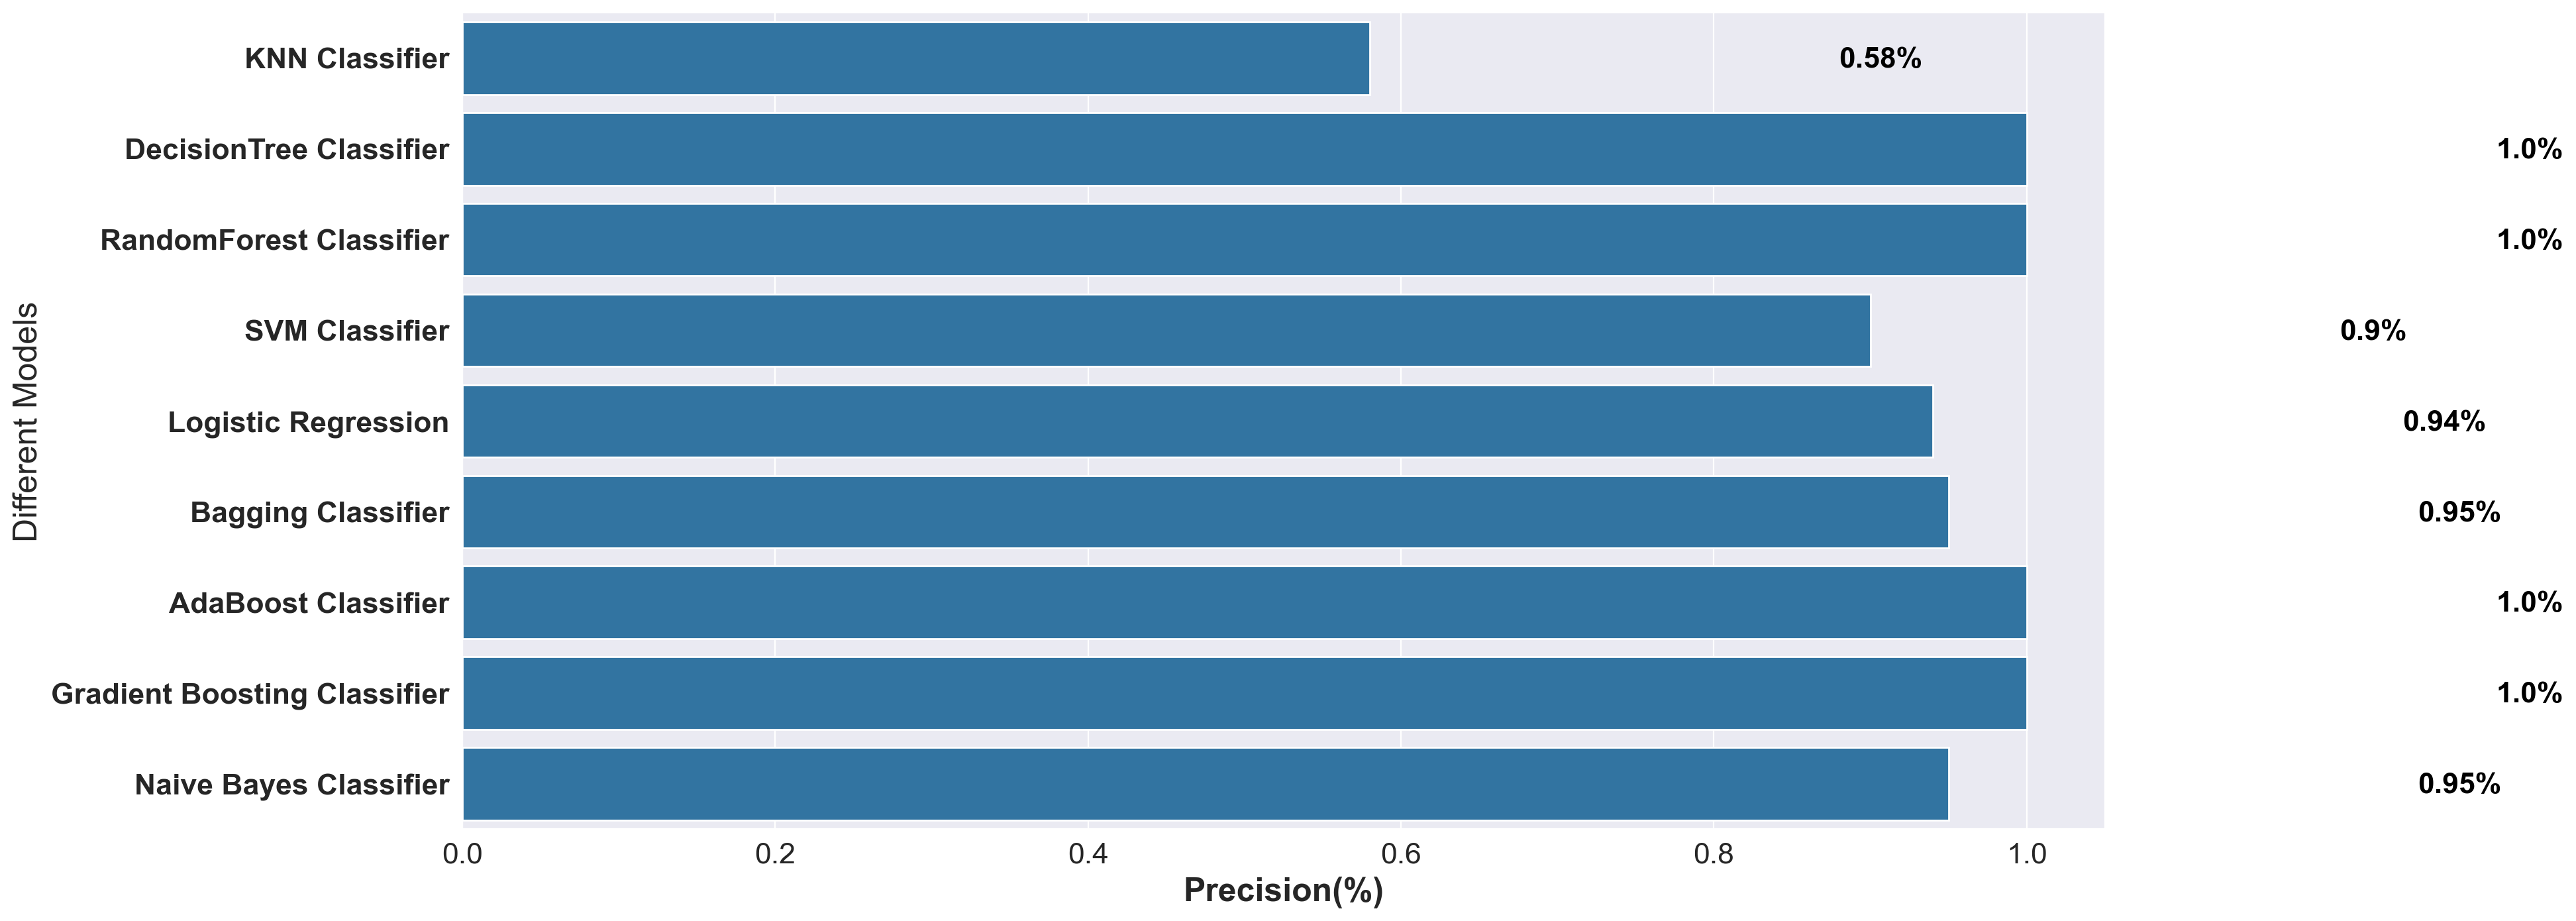

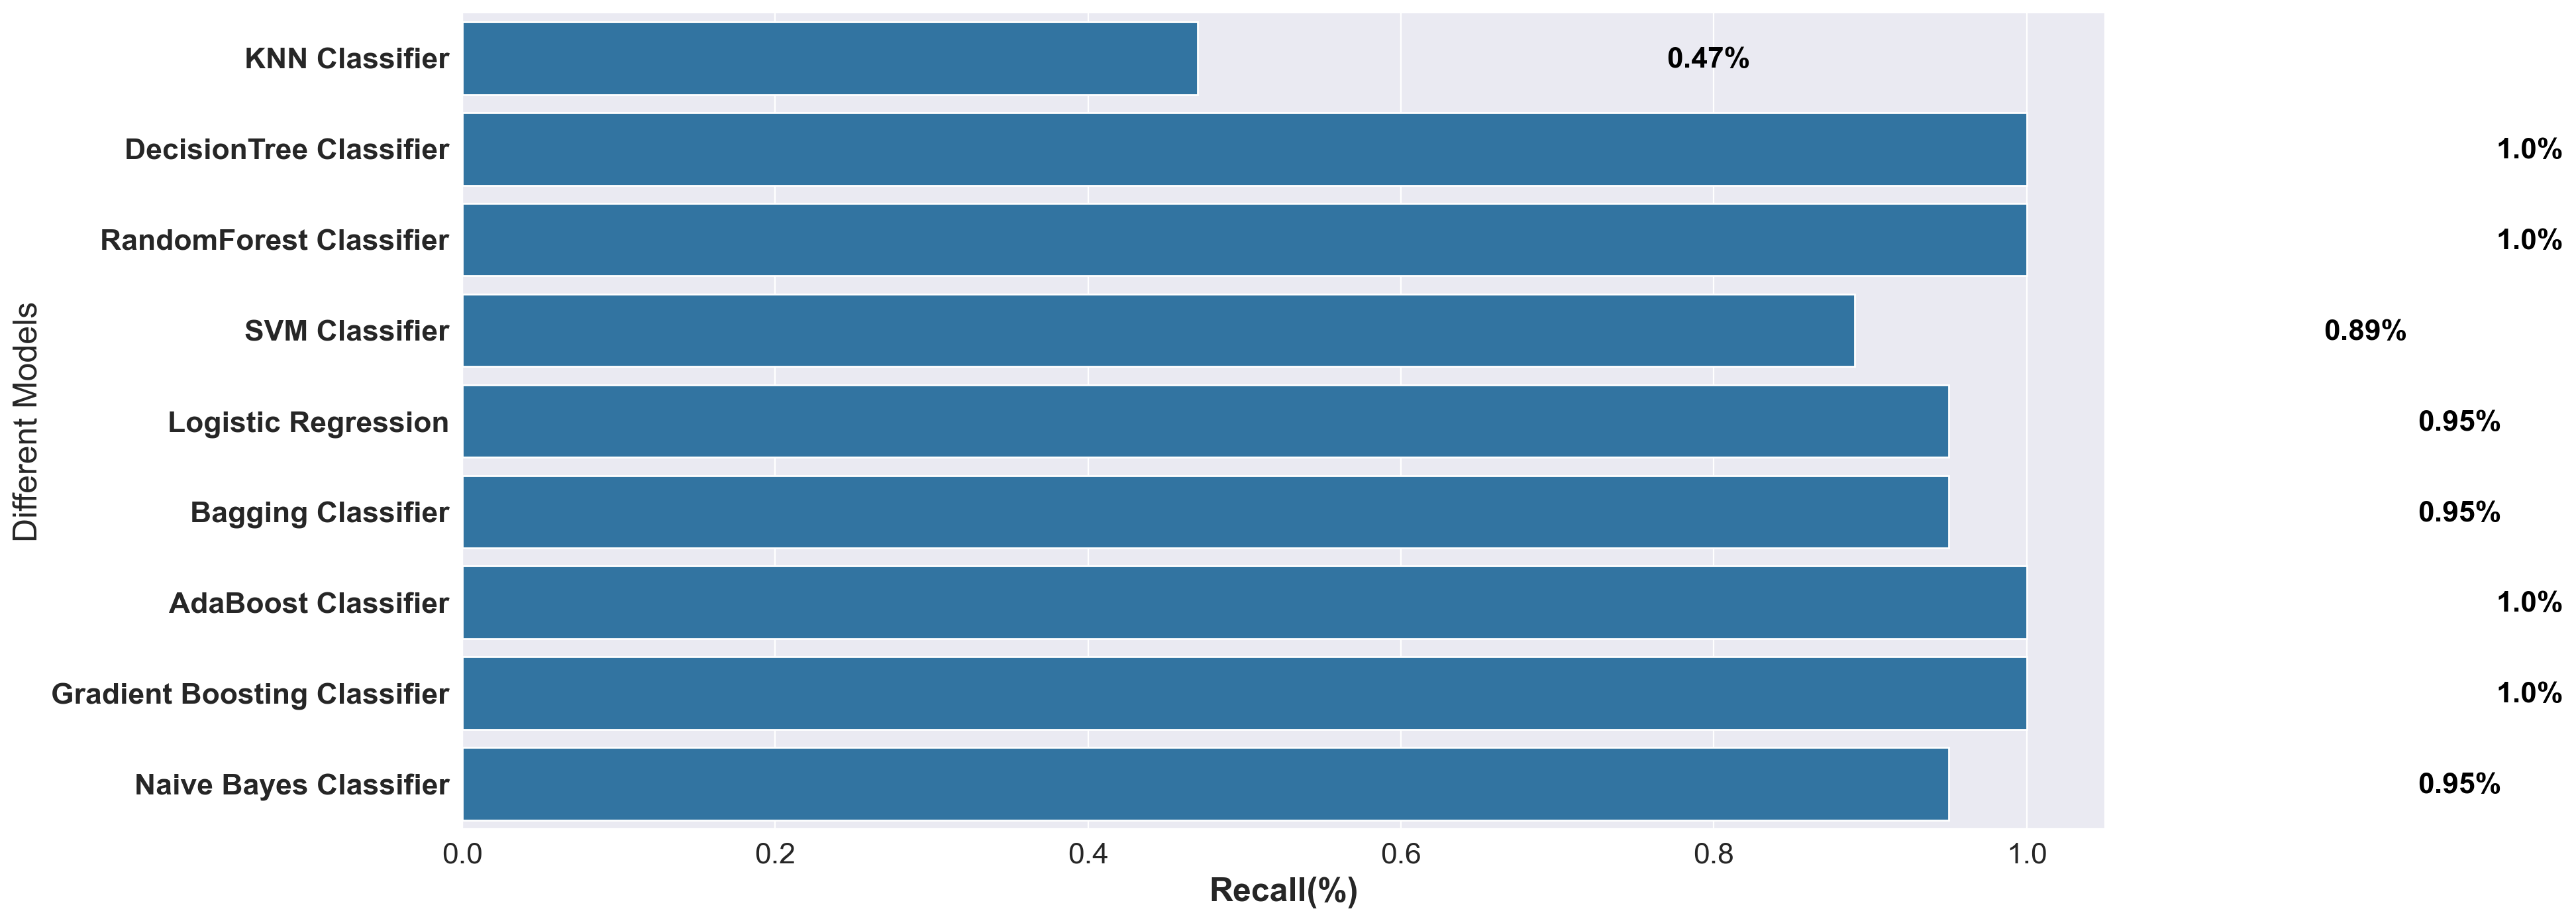

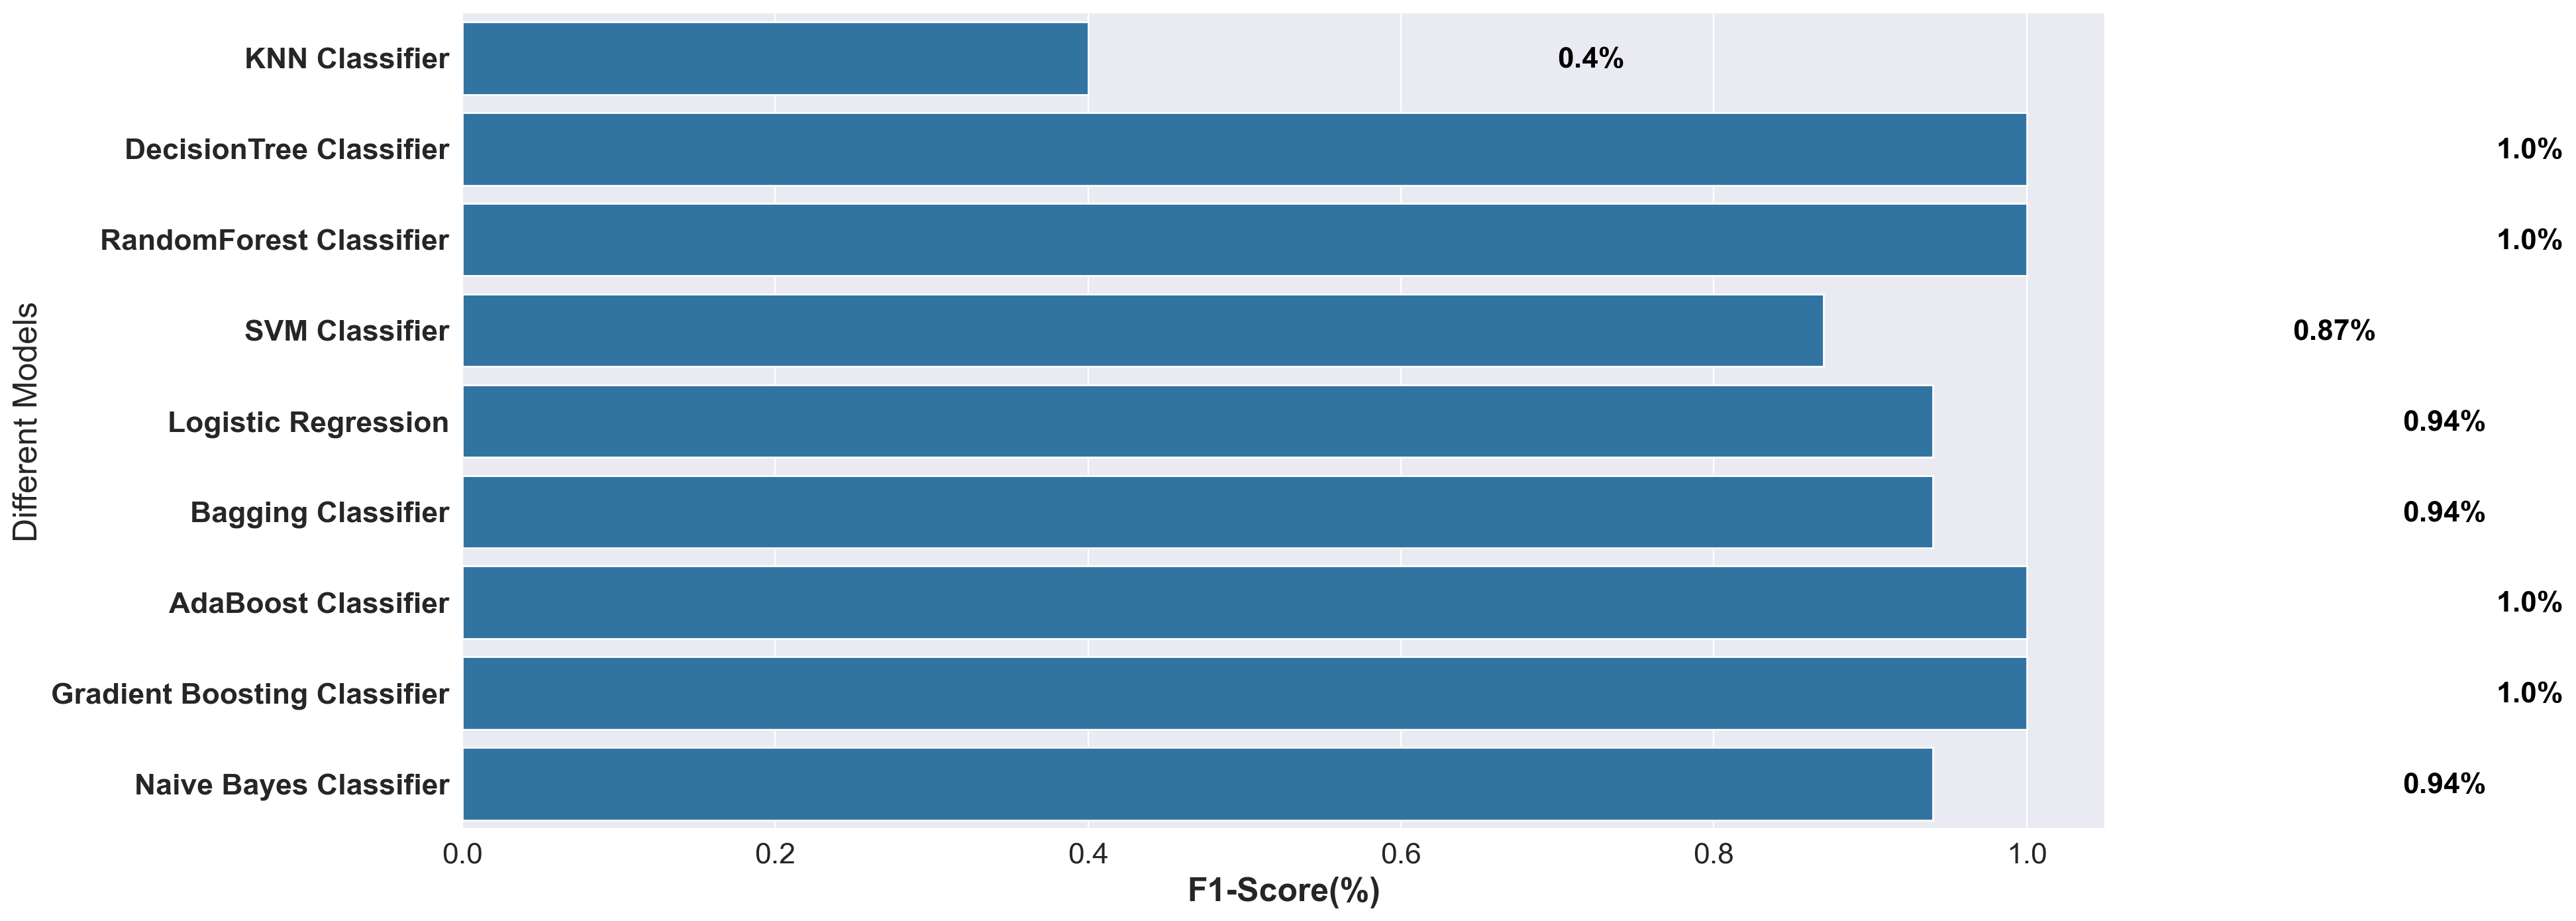

In [84]:
for column in table.columns[2:]:
    f, axe = plt.subplots(1,1, figsize=(16,8), dpi=200)
    sns.barplot(x=column, y='Models', data=table, ax = axe)
    axe.set_xlabel(column, size=18,fontweight = 'bold')
    axe.set_ylabel('Different Models', size=18)
    plt.yticks(fontsize=16,fontweight = 'bold')
    plt.xticks(fontsize=16)

    for i, v in enumerate(table[column].values):
        axe.text(v + 0.3 , i + .10, str(v)+'%',
                    color = 'black', fontweight = 'bold', fontsize= 16)


## **Model Building** - From CSV file

In [87]:
resume_data = pd.read_csv(r'Cleaned_Resumes.csv')
resume_data.head()

Resumes    Profiles  \
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  Peoplesoft   
1  Classification: Internal\n\nClassification: In...  Peoplesoft   
2  SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  Peoplesoft   
3  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  Peoplesoft   
4  PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...  Peoplesoft   

                                       Clean_Resumes  
0  anubhav kumar singh core competencies scriptin...  
1  classification internal classification interna...  
2  sirazuddin bangalore india sirazuddin bangalor...  
3  peoplesoft admin varkala vikas career objectiv...  
4  peoplesoft admin peoplesoft dba ganesh alladi ...

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [89]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Profiles"])

resume_data

Resumes    Profiles  \
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  Peoplesoft   
1   Classification: Internal\n\nClassification: In...  Peoplesoft   
2   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  Peoplesoft   
3   PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  Peoplesoft   
4   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...  Peoplesoft   
..                                                ...         ...   
72  Workday Integration Consultant\n\n\n\nName    ...     Workday   
73  Srikanth (WORKDAY hCM Consultant)\t           ...     Workday   
74  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...     Workday   
75  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...     Workday   
76  Vinay kumar .v\nWorkday Functional Consultant\...     Workday   

                                        Clean_Resumes  LebelEncoding  
0   anubhav kumar singh core competencies scriptin...              0  
1   classification internal classification interna...              0  
2   sirazuddin bangalore india sirazuddin bangalor...              0  
3   peoplesoft admin varkala vikas career objectiv...              0  
4   peoplesoft admin peoplesoft dba ganesh alladi ...              0  
..                                                ...            ...  
72  workday integration consultant name sri krishn...              3  
73  srikanth workday hcm consultant seeking suitab...              3  
74  workday hcm fcm name kumar role workday consul...              3  
75  venkateswarlu workday consultant professional ...              3  
76  vinay kumar workday functional consultant expe...              3  

[77 rows x 4 columns]

In [90]:
resume_data.describe()

LebelEncoding
count      77.000000
mean        1.467532
std         1.153763
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         3.000000

In [91]:
resume_data.isnull().sum()

Resumes          0
Profiles         0
Clean_Resumes    0
LebelEncoding    0
dtype: int64

## check for imbalance

Class Counts:
Profiles
React Developer    22
Workday            21
Peoplesoft         20
SQL Developer      14
Name: count, dtype: int64

Class Proportions:
Profiles
React Developer    0.285714
Workday            0.272727
Peoplesoft         0.259740
SQL Developer      0.181818
Name: count, dtype: float64


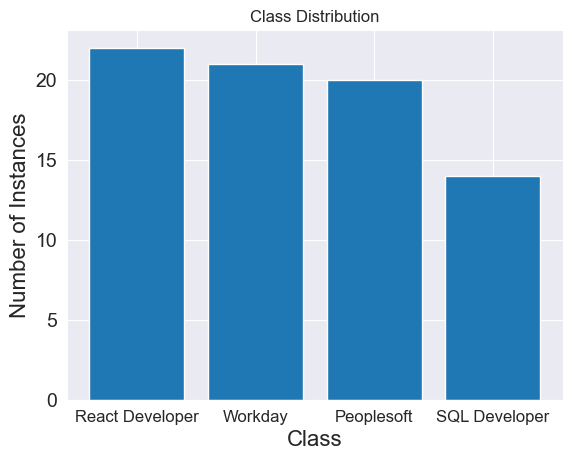

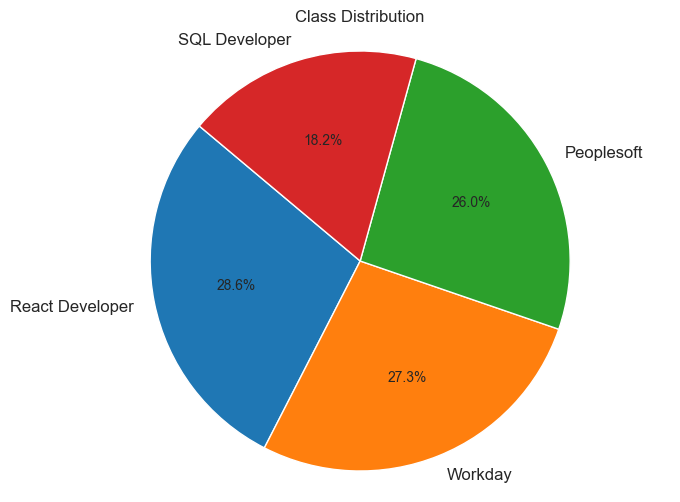

In [92]:
import pandas as pd

# Count the occurrences of each class in the target column
class_counts = resume_data['Profiles'].value_counts()

# Calculate the proportion of each class
class_proportions = class_counts / len(df)

# Print the class counts and proportions
print("Class Counts:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)

# Plot the class distribution (optional)
import matplotlib.pyplot as plt

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.show()
# Plot a pie chart
categories = ['React Developer', 'Workday', 'Peoplesoft', 'SQL Developer']
plt.figure(figsize=(8, 6))
plt.pie(class_proportions, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [93]:
class_counts = {
    'React Developer': 22,
    'Workday': 21,
    'Peoplesoft': 20,
    'SQL Developer': 14
}

max_count = max(class_counts.values())
min_count = min(class_counts.values())

# Calculate the class imbalance ratio
imbalance_ratio = max_count / min_count

print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 1.5714285714285714


With an imbalance ratio of approximately 1.57, it indicates that the dataset is slightly imbalanced, but not severely so

## 4. Model Building

### 4.1 Train - Test Split

In [94]:
x = resume_data['Clean_Resumes'].values
y = resume_data['Profiles'].values

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((57,), (20,))

### 4.2 TF-IDF Vectorization

In [96]:
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [97]:
x_train = tfidf_vectorizer.fit_transform(x_train)
x_test = tfidf_vectorizer.transform(x_test)

In [98]:
train_data = (x_train, y_train)

In [100]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   --- ----------------------------------- 20.5/258.0 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/258.0 kB 217.9 kB/s eta 0:00:02
   ------- ------------------------------- 51.2/258.0 kB 262.6 kB/s eta 0:00:01
   --------------- ---------------------- 102.4/258.0 kB 420.8 kB/s eta 0:00:01
   ------------------------------- ------ 215.0/258.0 kB 769.9 kB/s eta 0:00:01
   -------------------------------------- 258.0/258.0 kB 834.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [101]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x_train,y_train)


In [102]:
x_resampled.shape, y_resampled.shape

((40, 3601), (40,))

In [103]:
x_train.shape, x_test.shape

((57, 3601), (20, 3601))

In [104]:
print(y_train),print(y_test)

['Peoplesoft' 'React Developer' 'Workday' 'React Developer'
 'React Developer' 'Peoplesoft' 'SQL Developer' 'Peoplesoft' 'Peoplesoft'
 'React Developer' 'React Developer' 'SQL Developer' 'React Developer'
 'Workday' 'SQL Developer' 'Workday' 'React Developer' 'Peoplesoft'
 'SQL Developer' 'React Developer' 'SQL Developer' 'Peoplesoft'
 'Peoplesoft' 'Peoplesoft' 'SQL Developer' 'Workday' 'Workday' 'Workday'
 'React Developer' 'Workday' 'React Developer' 'SQL Developer' 'Workday'
 'React Developer' 'Workday' 'SQL Developer' 'Workday' 'Peoplesoft'
 'Peoplesoft' 'SQL Developer' 'Peoplesoft' 'Workday' 'SQL Developer'
 'Peoplesoft' 'Workday' 'Peoplesoft' 'Workday' 'Workday' 'Workday'
 'Workday' 'Peoplesoft' 'React Developer' 'React Developer'
 'React Developer' 'Peoplesoft' 'React Developer' 'React Developer']
['Peoplesoft' 'SQL Developer' 'React Developer' 'SQL Developer'
 'React Developer' 'Workday' 'React Developer' 'Peoplesoft'
 'React Developer' 'Workday' 'Peoplesoft' 'SQL Developer' 'S

(None, None)

# 5. Classification Models

## 5.1 KNN Classifier 

In [105]:
# Calculate the number of neighbors that is less than or equal to the number of samples in the resampled data
n_neighbors = min(41, x_resampled.shape[0])

# Initialize and train the KNeighborsClassifier model using the resampled data
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
model_knn.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred = model_knn.predict(x_test)

# Calculate accuracy, precision, recall, F1-score
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='macro')
recall_knn = recall_score(y_test, y_pred, average='macro')
f1_knn = f1_score(y_test, y_pred, average='macro')

# Calculate confusion matrix
nb_cm = confusion_matrix(y_test, y_pred)

# Print accuracy and classification report
print('Accuracy of test set    : {:.2f}'.format(accuracy_knn))
print("Precision: {:.2f}".format(precision_knn))
print("Recall: {:.2f}".format(recall_knn))
print("F1-score: {:.2f}".format(f1_knn))
print("Confusion Matrix:\n", nb_cm)
print("\nClassification report for classifier %s:\n%s\n" % (model_knn, classification_report(y_test, y_pred)))

Accuracy of test set    : 0.25
Precision: 0.06
Recall: 0.25
F1-score: 0.10
Confusion Matrix:
 [[5 0 0 0]
 [6 0 0 0]
 [4 0 0 0]
 [5 0 0 0]]

Classification report for classifier KNeighborsClassifier(n_neighbors=40):
                 precision    recall  f1-score   support

     Peoplesoft       0.25      1.00      0.40         5
React Developer       0.00      0.00      0.00         6
  SQL Developer       0.00      0.00      0.00         4
        Workday       0.00      0.00      0.00         5

       accuracy                           0.25        20
      macro avg       0.06      0.25      0.10        20
   weighted avg       0.06      0.25      0.10        20




In [106]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)
print("Confusion Matrix:\n", nb_cm)

Accuracy of training set : 0.63
Accuracy of  test set    : 0.65
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                 precision    recall  f1-score   support

     Peoplesoft       0.67      0.40      0.50         5
React Developer       1.00      1.00      1.00         6
  SQL Developer       0.00      0.00      0.00         4
        Workday       0.45      1.00      0.62         5

       accuracy                           0.65        20
      macro avg       0.53      0.60      0.53        20
   weighted avg       0.58      0.65      0.58        20


Confusion Matrix:
 [[2 0 0 3]
 [0 6 0 0]
 [1 0 0 3]
 [0 0 0 5]]


## 5.2 Decision Tree Classifier


In [107]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_resampled, y_resampled)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
print("Confusion Matrix:\n", nb_cm)
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier DecisionTreeClassifier():
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React Developer       1.00      1.00      1.00         6
  SQL Developer       1.00      1.00      1.00         4
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[2 0 0 3]
 [0 6 0 0]
 [1 0 0 3]
 [0 0 0 5]]


## 5.3 Random Forest Classifier


In [108]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_resampled, y_resampled)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)
print("Confusion Matrix:\n", nb_cm)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React Developer       1.00      1.00      1.00         6
  SQL Developer       1.00      1.00      1.00         4
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[5 0 0 0]
 [0 6 0 0]
 [0 0 4 0]
 [0 0 0 5]]


## 5.4 Support Vectore Machine (SVM) Classifier

In [109]:
model_svm = SVC()
model_svm.fit(x_resampled, y_resampled)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", nb_cm)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)


Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier SVC():
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React Developer       1.00      1.00      1.00         6
  SQL Developer       1.00      1.00      1.00         4
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[5 0 0 0]
 [0 6 0 0]
 [0 0 4 0]
 [0 0 0 5]]


In [110]:
import pickle 
# Save the model and TF-IDF vectorizer
with open('finalized_model.pkl', 'wb') as file:
    pickle.dump((model_svm, tfidf_vectorizer), file)
print("TF-IDF Vector Shape:", X_train_tfidf.shape)

TF-IDF Vector Shape: (1, 3746)


## 5.5 Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
model_LR = LogisticRegression()

# Train the model using the resampled data
model_LR.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred = model_LR.predict(x_test)

# Calculate accuracy, precision, recall, F1-score
accuracy_LR = accuracy_score(y_test, y_pred)
precision_LR = precision_score(y_test, y_pred, average='macro')
recall_LR = recall_score(y_test, y_pred, average='macro')
f1_LR = f1_score(y_test, y_pred, average='macro')

# Calculate confusion matrix
cm_LR = confusion_matrix(y_test, y_pred)

# Print accuracy and classification report
print('Accuracy of test set    : {:.2f}'.format(accuracy_LR))
print("Precision: {:.2f}".format(precision_LR))
print("Recall: {:.2f}".format(recall_LR))
print("F1-score: {:.2f}".format(f1_LR))
print("Confusion Matrix:\n", cm_LR)
print("\nClassification report for classifier %s:\n%s\n" % (model_LR, classification_report(y_test, y_pred)))


Accuracy of test set    : 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Confusion Matrix:
 [[5 0 0 0]
 [0 6 0 0]
 [0 0 4 0]
 [0 0 0 5]]

Classification report for classifier LogisticRegression():
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React Developer       1.00      1.00      1.00         6
  SQL Developer       1.00      1.00      1.00         4
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20




## 5.6 Bagging Classifier 

In [112]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_resampled, y_resampled)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)
print("Confusion Matrix:\n", nb_cm)

Accuracy of training set : 0.98
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React Developer       1.00      1.00      1.00         6
  SQL Developer       1.00      1.00      1.00         4
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[5 0 0 0]
 [0 6 0 0]
 [0 0 4 0]
 [0 0 0 5]]


## 5.7 AdaBoost Classifier 

In [113]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_resampled, y_resampled)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)
print("Confusion Matrix:\n", nb_cm)

Accuracy of training set : 0.95
Accuracy of  test set    : 1.00
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React Developer       1.00      1.00      1.00         6
  SQL Developer       1.00      1.00      1.00         4
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[5 0 0 0]
 [0 6 0 0]
 [0 0 4 0]
 [0 0 0 5]]


## 5.8 Gradient Boosting Classifier

In [114]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_resampled, y_resampled)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)
print("Confusion Matrix:\n", nb_cm)

Accuracy of training set : 0.96
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React Developer       1.00      1.00      1.00         6
  SQL Developer       1.00      1.00      1.00         4
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[5 0 0 0]
 [0 6 0 0]
 [0 0 4 0]
 [0 0 0 5]]


## 5.9 Naive Bayes Classifier

In [115]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_resampled, y_resampled)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)
print("Confusion Matrix:\n", nb_cm)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React Developer       1.00      1.00      1.00         6
  SQL Developer       1.00      1.00      1.00         4
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[5 0 0 0]
 [0 6 0 0]
 [0 0 4 0]
 [0 0 0 5]]


## 6. Model Evaluation

In [116]:
Evaluation = {
    "Models": ["KNN Classifier", "DecisionTree Classifier", "RandomForest Classifier", "SVM Classifier", 
                "Bagging Classifier", "AdaBoost Classifier", "Gradient Boosting Classifier",
               "Naive Bayes Classifier"],
    "Train_Accuracy(%)": [
        model_knn.score(x_resampled, y_resampled),
        model_DT.score(x_resampled, y_resampled),
        model_RF.score(x_resampled, y_resampled),
        model_svm.score(x_resampled, y_resampled),
        #model_lgr.score(x_train, y_train),
        model_bagg.score(x_resampled, y_resampled),
        model_Adaboost.score(x_resampled, y_resampled),
        model_GradientBoost.score(x_resampled, y_resampled),
        model_NB.score(x_resampled, y_resampled)
    ],
    "Test_Accuracy(%)": [
        accuracy_knn,
        accuracy_DT,
        accuracy_RF,
        accuracy_svm,
        #accuracy_lgr,
        accuracy_bagg,
        accuracy_Adaboost,
        accuracy_GradientBoost,
        accuracy_NB
    ],
    "Precision(%)": [
        precision_knn,
        precision_DT,
        precision_RF,
        precision_svm,
        #precision_lgr,
        precision_bagg,
        precision_Adaboost,
        precision_Gradientboost,
        precision_NB
    ],
    "Recall(%)": [
        recall_knn,
        recall_DT,
        recall_RF,
        recall_svm,
        #recall_lgr,
        recall_bagg,
        recall_Adaboost,
        recall_Gradientboost,
        recall_NB
    ],
    "F1-Score(%)": [
        f1_knn,
        f1_DT,
        f1_RF,
        f1_svm,
        #f1_lgr,
        f1_bagg,
        f1_Adaboost,
        f1_Gradientboost,
        f1_NB
    ]
}

table = pd.DataFrame(Evaluation)
table


Models  Train_Accuracy(%)  Test_Accuracy(%)  \
0                KNN Classifier              0.600              0.65   
1       DecisionTree Classifier              1.000              1.00   
2       RandomForest Classifier              1.000              1.00   
3                SVM Classifier              1.000              1.00   
4            Bagging Classifier              0.975              1.00   
5           AdaBoost Classifier              1.000              1.00   
6  Gradient Boosting Classifier              1.000              1.00   
7        Naive Bayes Classifier              1.000              1.00   

   Precision(%)  Recall(%)  F1-Score(%)  
0          0.53        0.6         0.53  
1          1.00        1.0         1.00  
2          1.00        1.0         1.00  
3          1.00        1.0         1.00  
4          1.00        1.0         1.00  
5          1.00        1.0         1.00  
6          1.00        1.0         1.00  
7          1.00        1.0         1.00

In [117]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", #"Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,#accuracy_lgr*100,
              accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  #model_lgr.score(x_train, y_train)*100,
                  model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

### 6.1 Train and Test Accuracy Plot 

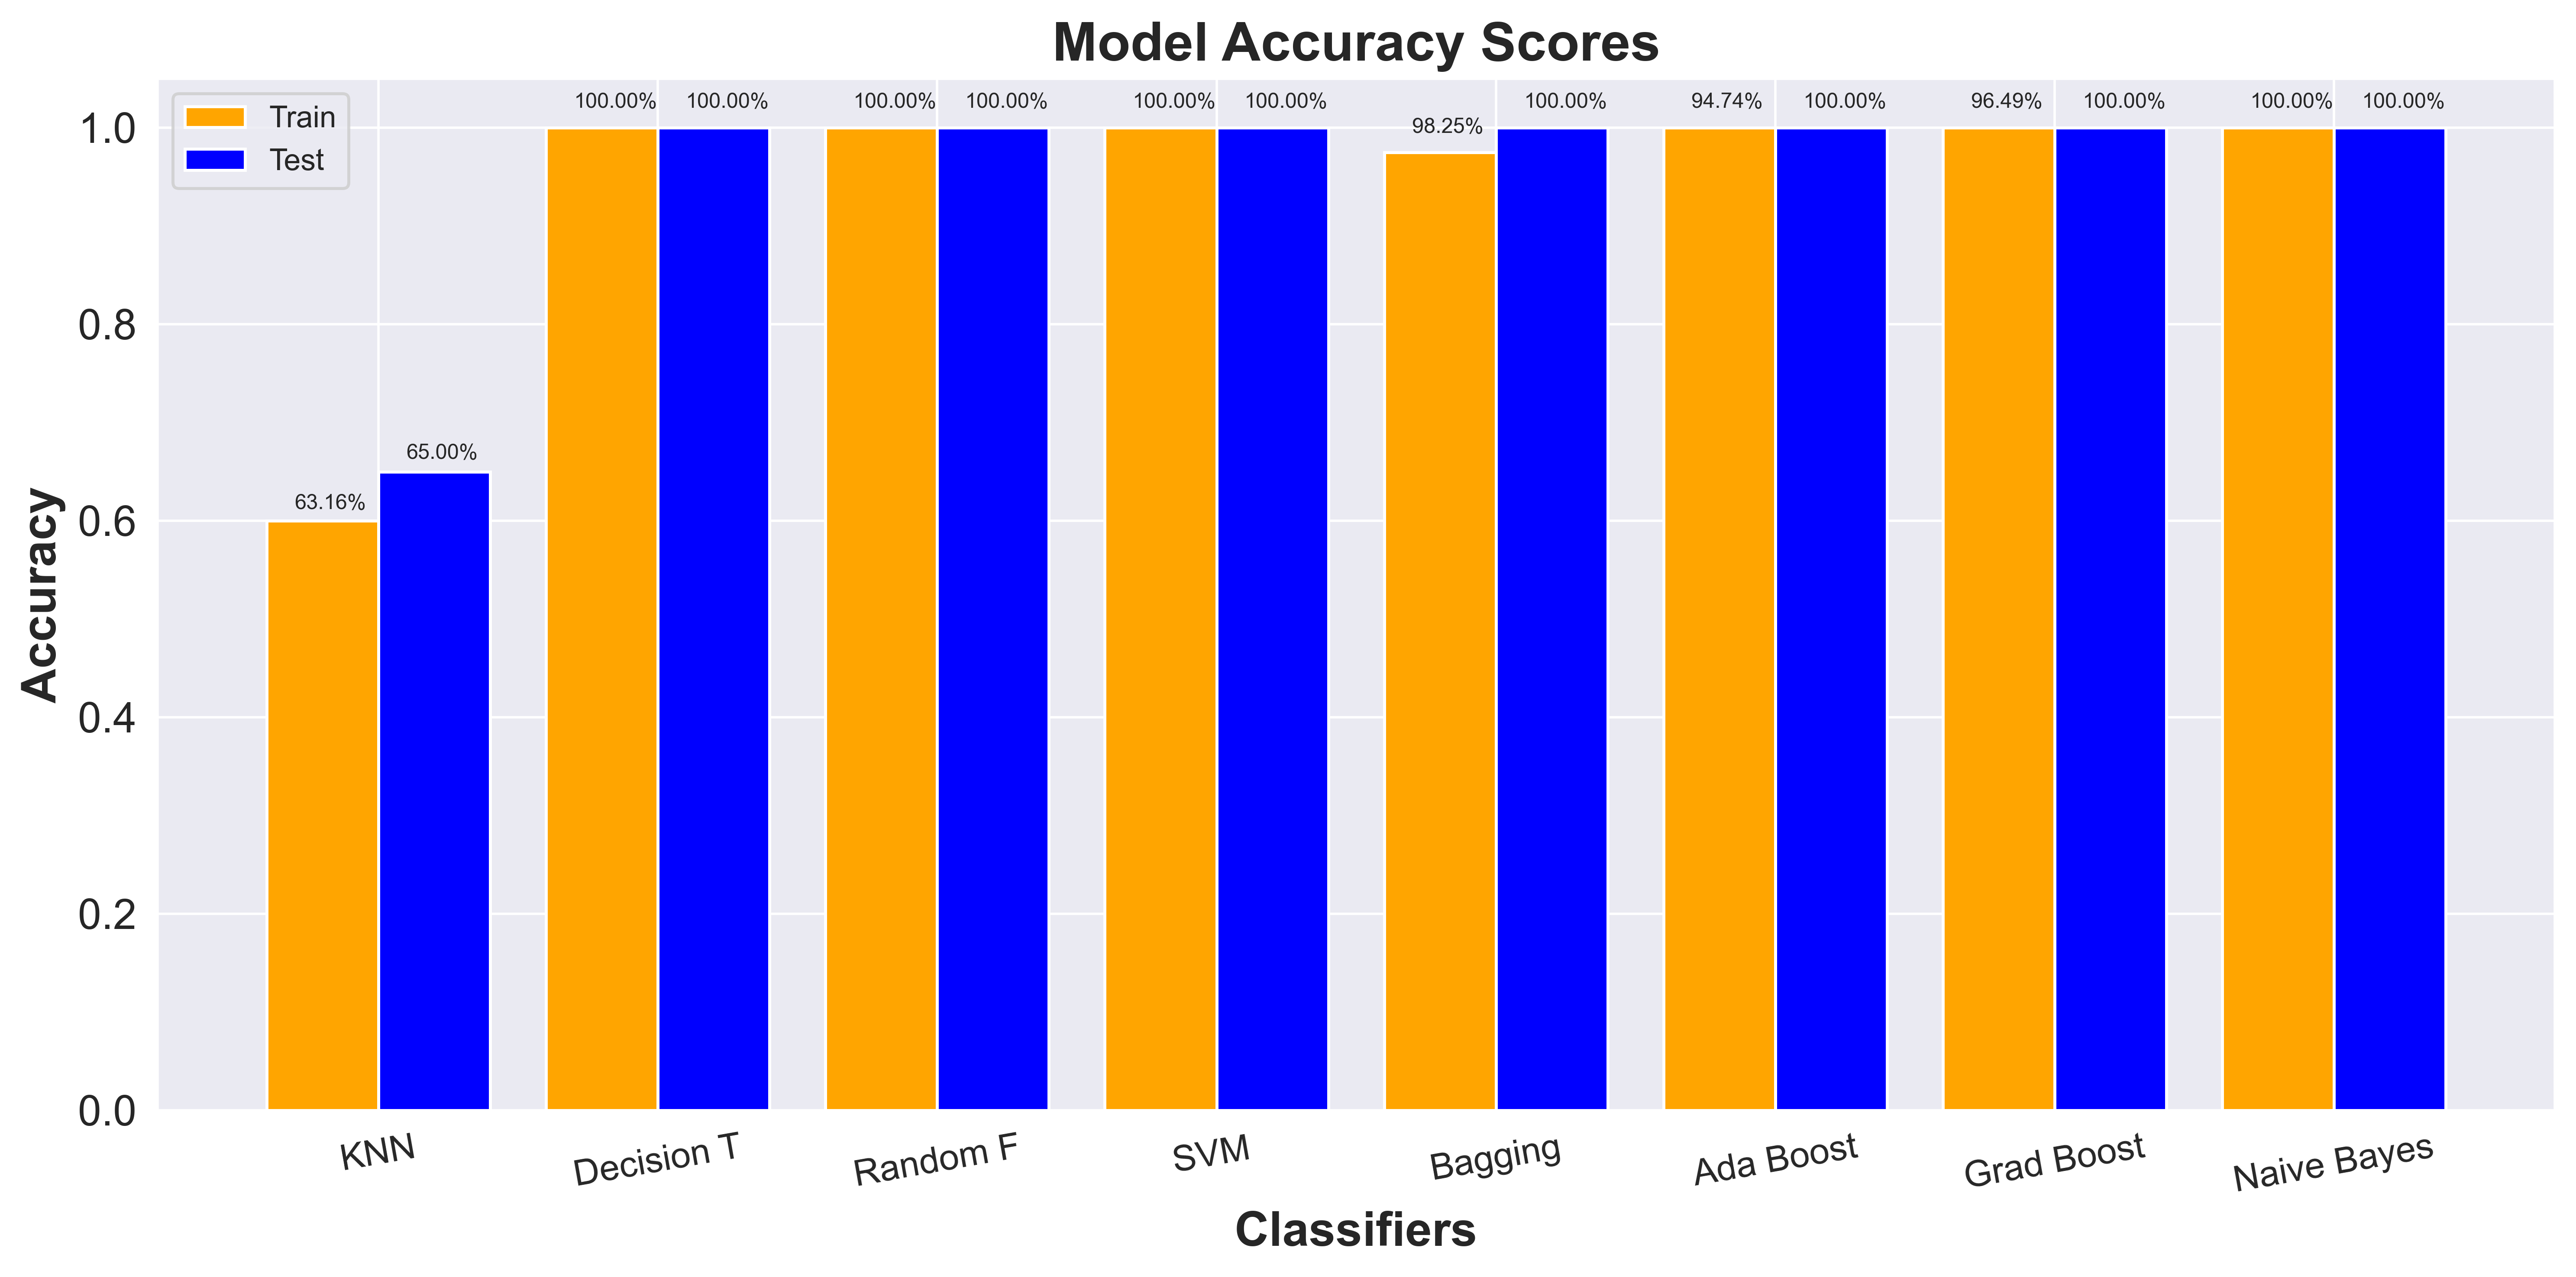

In [118]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'11','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", #"Logistic", 
               "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
#fig.savefig('IMG\Mod_Acc_Bar', dpi = 500)

## Deployment

In [119]:
import pickle 
pickle_out = open("model_svm.pkl", "wb") 
pickle.dump(classifier, pickle_out) 
pickle_out.close()